# Long notebook

# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [85]:
# Reading datasets
beer_train = pd.read_csv('beer_train.csv', parse_dates=['Date'])
beer_test = pd.read_csv('beer_test.csv', parse_dates=['Date'])
sku_features = pd.read_csv('sku_features.csv')
id_map = pd.read_csv('id_store_sku.csv')

In [3]:
print(beer_train.info())
beer_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382321 entries, 0 to 1382320
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Date     1382321 non-null  datetime64[ns]
 1   ts_id    1382321 non-null  int64         
 2   isPromo  1382321 non-null  float64       
 3   Sales    1382321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 42.2 MB
None


Date  ts_id  isPromo  Sales
0 2015-06-15      0      0.0   0.10
1 2015-06-15      1      0.0   0.35
2 2015-06-15      2      1.0   0.60
3 2015-06-15      3      1.0   0.35
4 2015-06-15      4      0.0   0.15

In [4]:
print(beer_test.info())
beer_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192882 entries, 0 to 192881
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       192882 non-null  int64         
 1   Date     192882 non-null  datetime64[ns]
 2   ts_id    192882 non-null  int64         
 3   isPromo  192882 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.9 MB
None


id       Date  ts_id  isPromo
0   0 2017-06-15      0      0.0
1   1 2017-06-15      1      1.0
2   2 2017-06-15      2      1.0
3   3 2017-06-15      3      1.0
4   4 2017-06-15      4      0.0

In [86]:
print(len(beer_train[beer_train['Sales']<0]))

9


In [5]:
sku_features

SKU      Segment    Pack       Product  \
0           _Carlsberg Can 0,45   MainStream     Can         Lager   
1      _Flash Up Energy PET 0,5  High Margin     PET  Energy-drink   
2          _Holsten Bottle 0,47      Premium  Bottle         Lager   
3        _Tuborg Green Can 0,45      Premium     Can         Lager   
4     _Tuborg Green Bottle 0,48      Premium  Bottle         Lager   
5         _Zatecky Gus Can 0,45      Premium     Can         Lager   
6      _Zatecky Gus Bottle 0,48      Premium  Bottle         Lager   
7         _Zatecky Gus PET 1,42      Premium     PET         Lager   
8          _Baltika №0 Can 0,45      Premium     Can      Non-alco   
9          _Baltika №3 Can 0,45   MainStream     Can         Lager   
10         _Baltika №7 Can 0,45      Premium     Can         Lager   
11      _Baltika №7 Bottle 0,47      Premium  Bottle         Lager   
12         _Baltika №9 Can 0,45   MainStream     Can         Lager   
13  _Baltika Cooler Bottle 0,47   MainStream  Bottle         Lager   
14    _Baltika Draught PET 0,47      Premium     PET         Other   
15                _Don PET 1,42   MainStream     PET         Other   
16          _Firmennoe PET 1,42      Premium     PET         Other   
17    _Priazovskoye Bottle 0,47   MainStream  Bottle         Other   
18       _Priazovskoye PET 1,42   MainStream     PET         Other   

              Brand  Volume  
0         Carlsberg    0.45  
1             Flash    0.50  
2           Holsten    0.50  
3            Tuborg    0.45  
4            Tuborg    0.50  
5       Zatecky Gus    0.45  
6       Zatecky Gus    0.50  
7       Zatecky Gus    1.50  
8        Baltika №3    0.45  
9        Baltika №3    0.45  
10       Baltika №7    0.45  
11       Baltika №7    0.50  
12       Baltika №9    0.45  
13   Baltika Cooler    0.50  
14  Baltika Draught    0.50  
15              Don    1.50  
16        Firmennoe    1.50  
17     Priazovskoye    0.50  
18     Priazovskoye    1.50

In [6]:
id_map.head()

ts_id Store                      SKU
0      0  3301     _Baltika №0 Can 0,45
1      1  3301     _Baltika №3 Can 0,45
2      2  3301     _Baltika №7 Can 0,45
3      3  3301  _Baltika №7 Bottle 0,47
4      4  3301     _Baltika №9 Can 0,45

In [7]:
    
def plot_by_id(df, ts_id):
    df_ = df[df['ts_id'] == ts_id][['Date', 'Sales']]
    g = sns.lineplot(df_['Date'], df_['Sales'])
    plt.xticks(rotation=90)
    
def plot_promo_sales(df, ts_id):
    df_ = df[df['ts_id'] == ts_id][['Date', 'isPromo', 'Sales']]
    fig, axs = plt.subplots(2, 1, sharex=True)
    sns.lineplot(df_['Date'], df_['Sales'], ax=axs[0], color='r')
    sns.lineplot(df_['Date'], df_['isPromo'], ax=axs[1], color='b')
    plt.xticks(rotation=90)
    

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python39\lib\site-packages\seaborn\_decorators.py:36: Futu

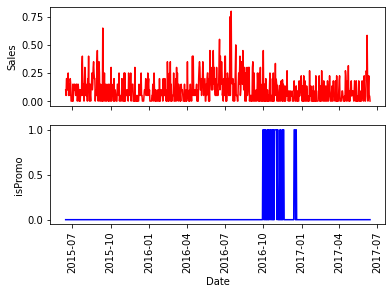

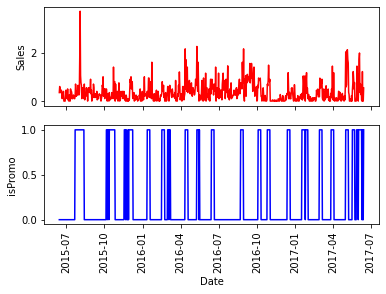

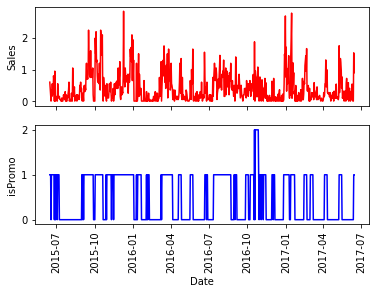

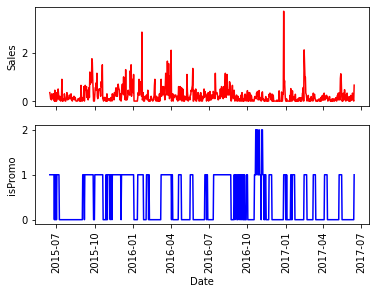

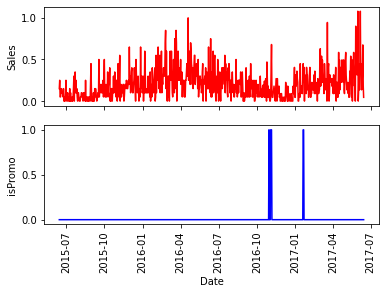

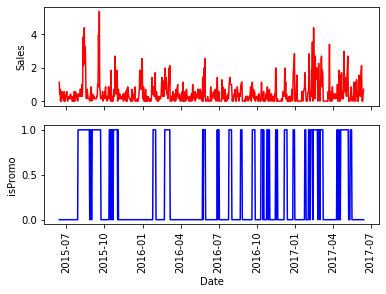

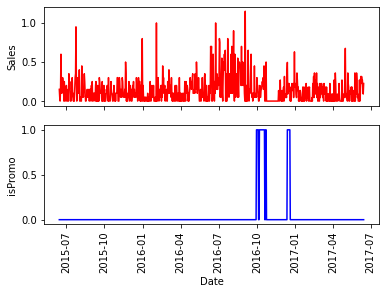

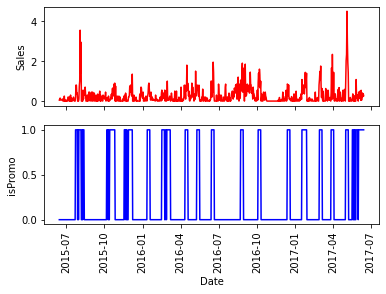

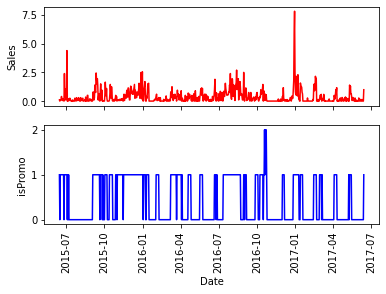

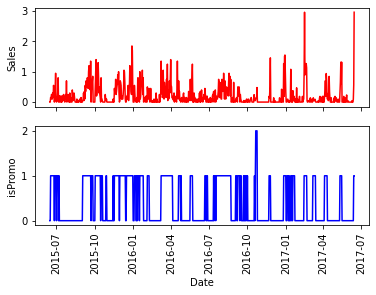

In [9]:
for i in beer_train['ts_id'].unique()[:10]:
    plot_promo_sales(beer_train, i)

In [10]:
dff = beer_train.groupby(["Date"]).Sales.sum().reset_index()

In [11]:
# days with huge sales numbers
dff[dff['Sales']>1000].Date

58    2015-08-12
60    2015-08-14
61    2015-08-15
87    2015-09-10
88    2015-09-11
89    2015-09-12
95    2015-09-18
96    2015-09-19
198   2015-12-30
199   2015-12-31
369   2016-06-18
397   2016-07-16
425   2016-08-13
432   2016-08-20
439   2016-08-27
564   2016-12-30
565   2016-12-31
613   2017-02-17
614   2017-02-18
689   2017-05-04
690   2017-05-05
691   2017-05-06
692   2017-05-07
698   2017-05-13
Name: Date, dtype: datetime64[ns]

In [12]:
# days with bad sales numbers
dff[dff['Sales']<200].Date

78    2015-09-01
345   2016-05-25
352   2016-06-01
444   2016-09-01
710   2017-05-25
717   2017-06-01
Name: Date, dtype: datetime64[ns]

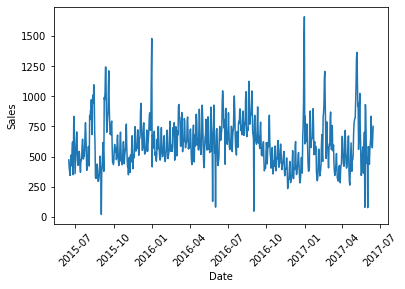

In [13]:
plt.plot(dff['Date'],dff['Sales'])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

## Missing values

In [14]:
beer_train.isnull().any()

Date       False
ts_id      False
isPromo    False
Sales      False
dtype: bool

In [15]:
beer_test.isnull().any()

id         False
Date       False
ts_id      False
isPromo    False
dtype: bool

In [16]:
id_map.isnull().any()

ts_id    False
Store    False
SKU      False
dtype: bool

In [17]:
sku_features.isnull().any()

SKU        False
Segment    False
Pack       False
Product    False
Brand      False
Volume     False
dtype: bool

## Distributions 

In [18]:
beer_train['Year'] = beer_train['Date'].astype(str).str[0:4]
beer_train['Month'] = beer_train['Date'].astype(str).str[5:7]
beer_train['Day'] = beer_train['Date'].astype(str).str[8:]

beer_test['Year'] = beer_test['Date'].astype(str).str[0:4]
beer_test['Month'] = beer_test['Date'].astype(str).str[5:7]
beer_test['Day'] = beer_test['Date'].astype(str).str[8:]

beer_train['Year'] = beer_train['Year'].astype(int)
beer_train['Month'] = beer_train['Month'].astype(int)
beer_train['Day'] = beer_train['Day'].astype(int)

beer_test['Year'] = beer_test['Year'].astype(int)
beer_test['Month'] = beer_test['Month'].astype(int)
beer_test['Day'] = beer_test['Day'].astype(int)

import datetime

beer_train['Date'] = pd.to_datetime(beer_train['Date'])
beer_train['Weekday'] = beer_train['Date'].dt.day_name()


beer_test['Date'] = pd.to_datetime(beer_test['Date'])
beer_test['Weekday'] = beer_test['Date'].dt.day_name()

m_sku_id = pd.merge(id_map,sku_features,on='SKU')

beer_train = pd.merge(beer_train,m_sku_id,on='ts_id')
beer_test = pd.merge(beer_test,m_sku_id,on='ts_id')

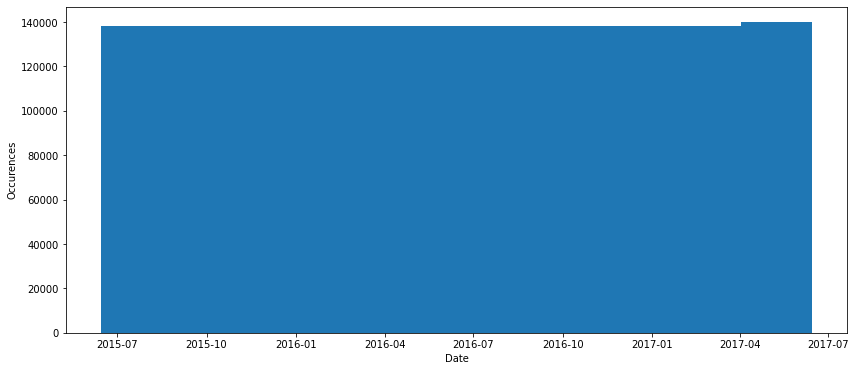

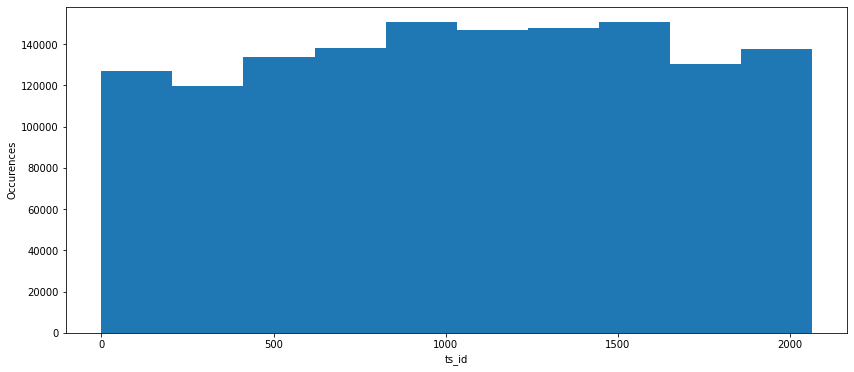

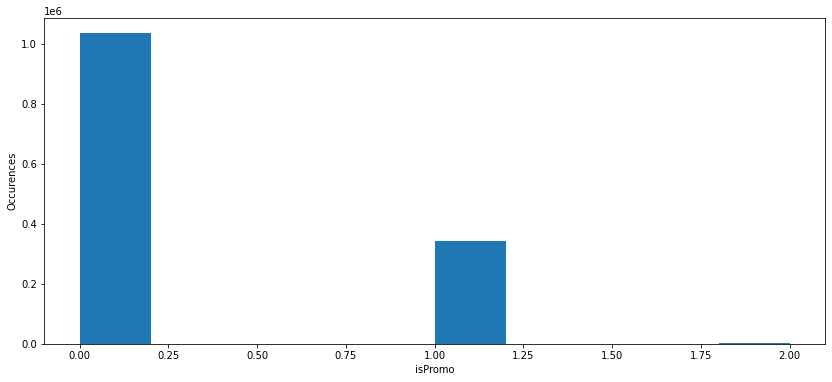

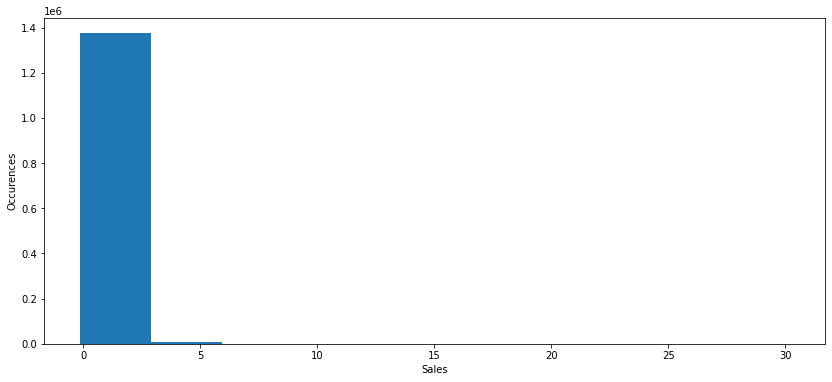

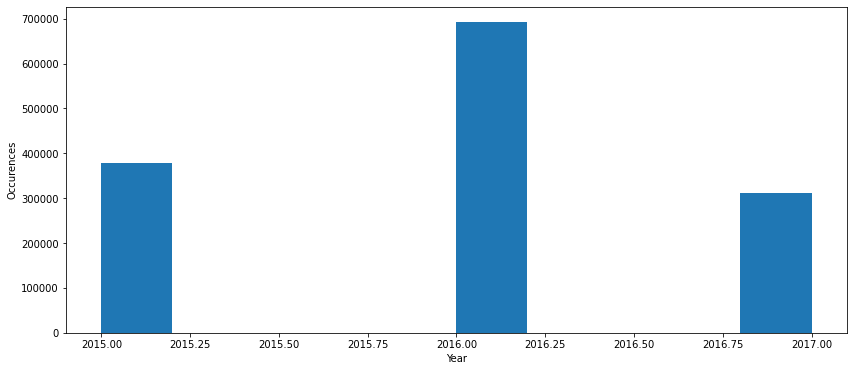

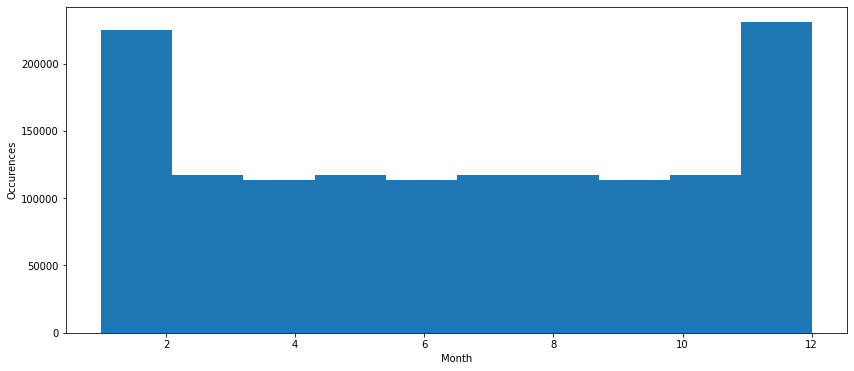

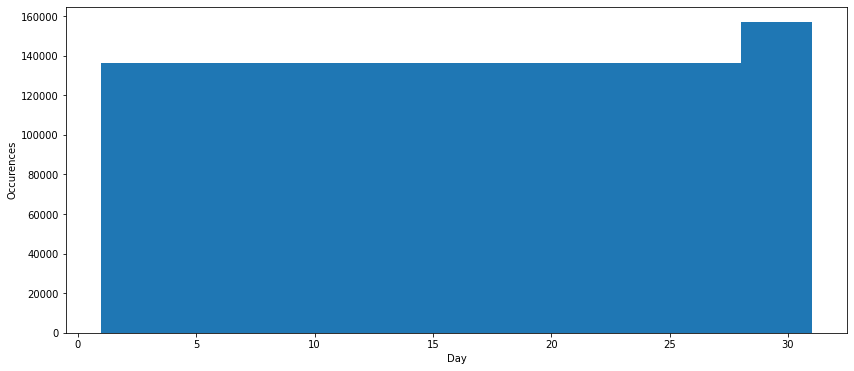

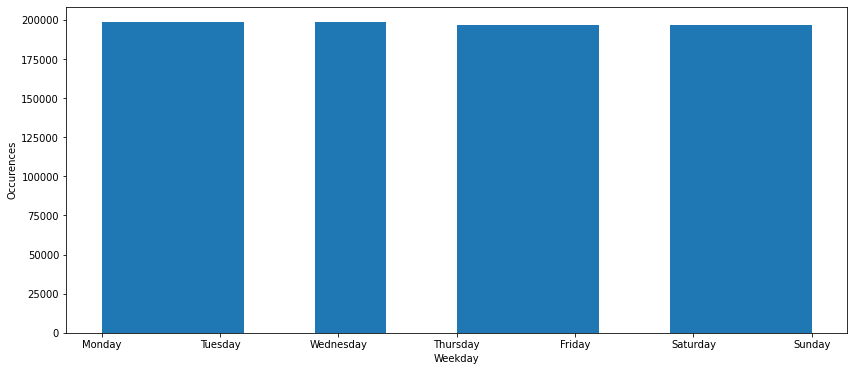

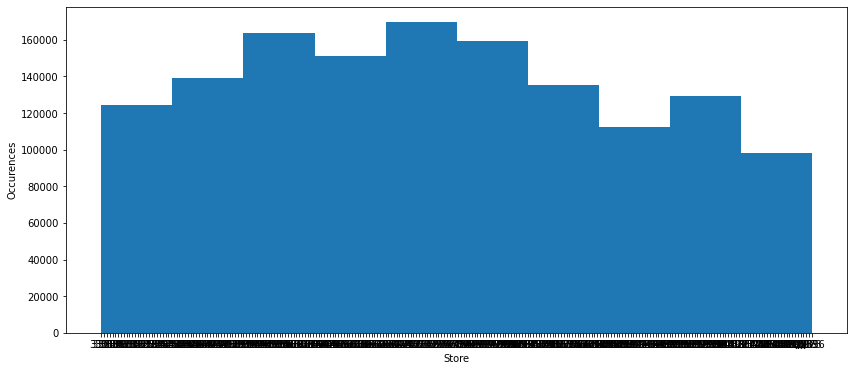

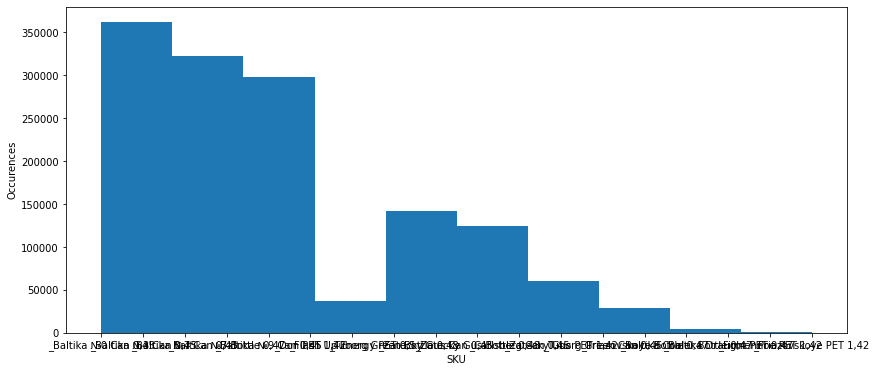

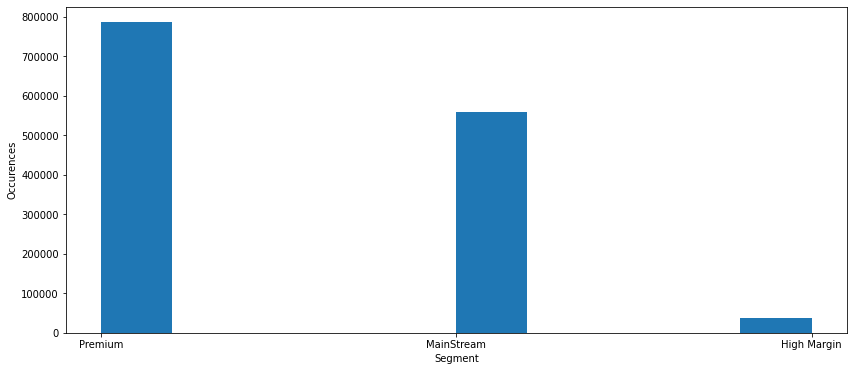

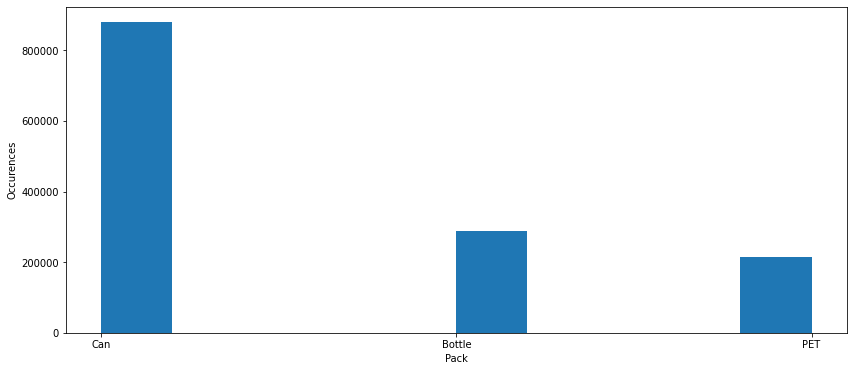

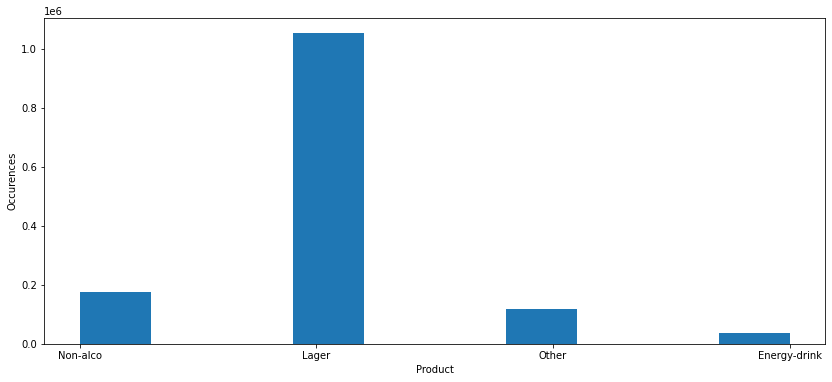

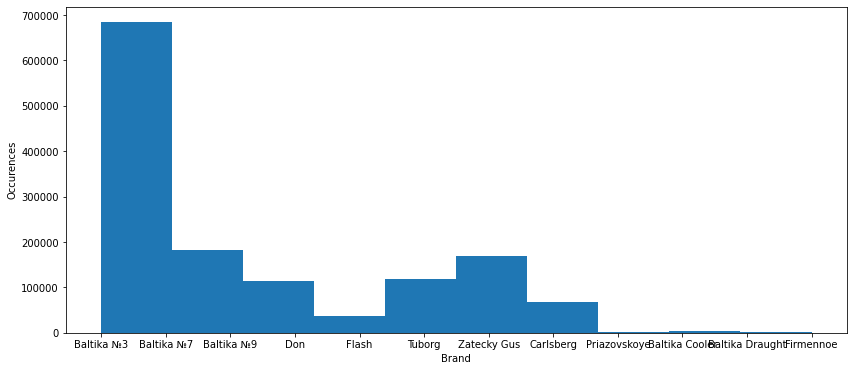

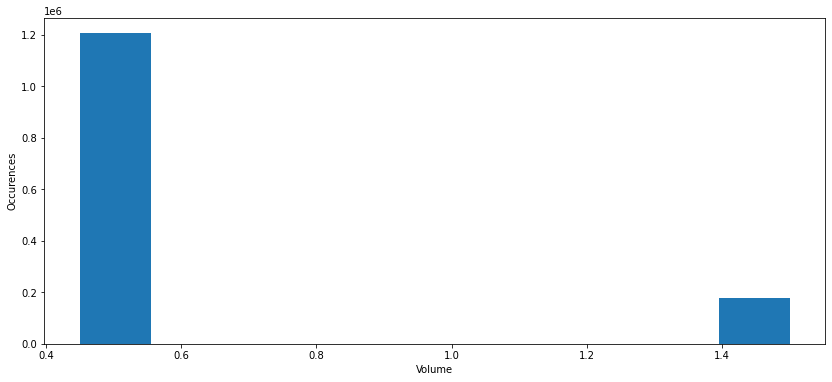

In [19]:
for i in beer_train:
    plt.figure(figsize=(14,6))
    plt.ylabel("Occurences")
    plt.xlabel(i)
    plt.hist(beer_train[i])
    plt.show()

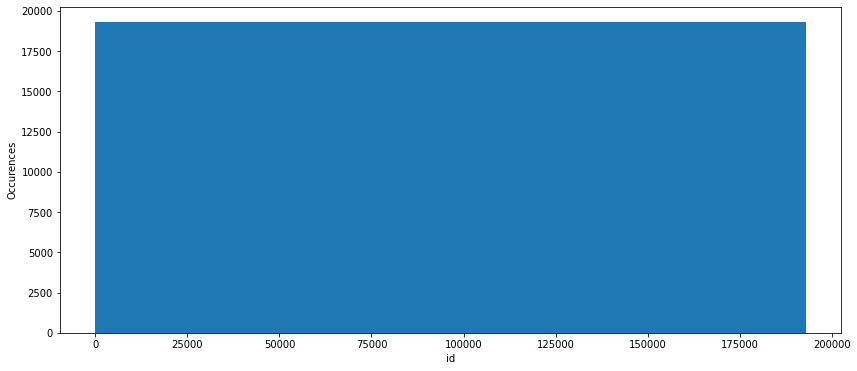

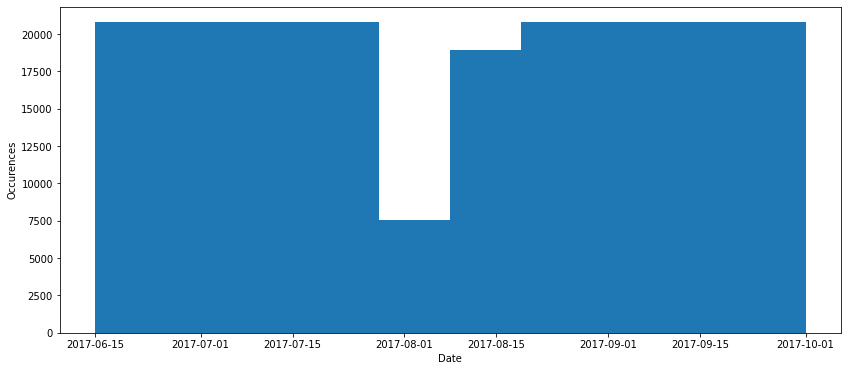

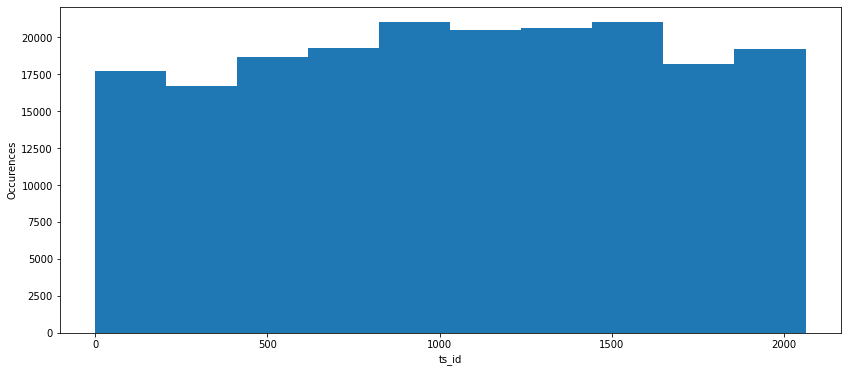

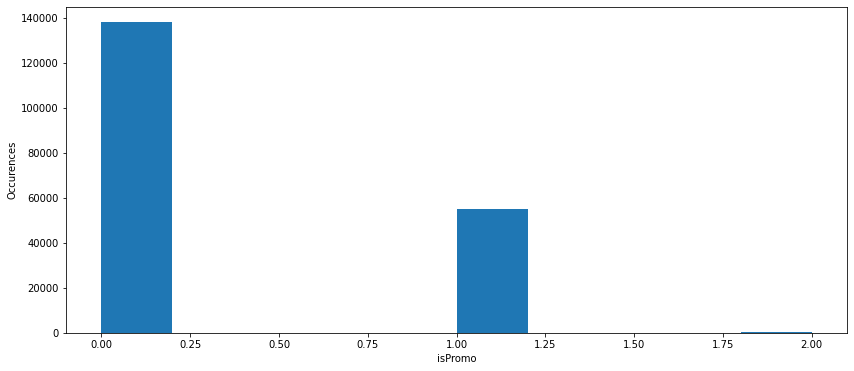

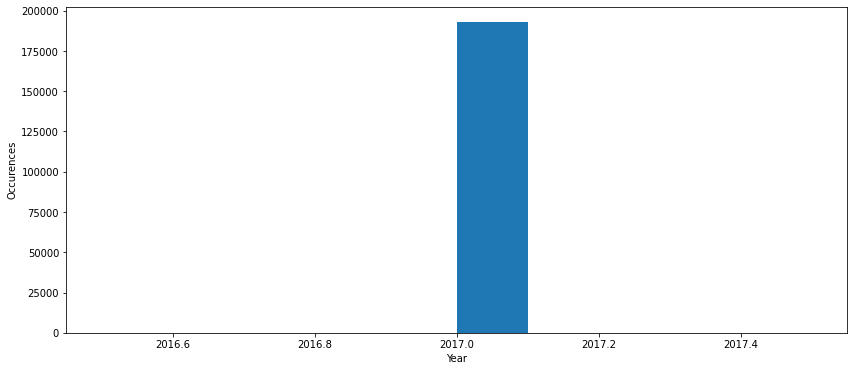

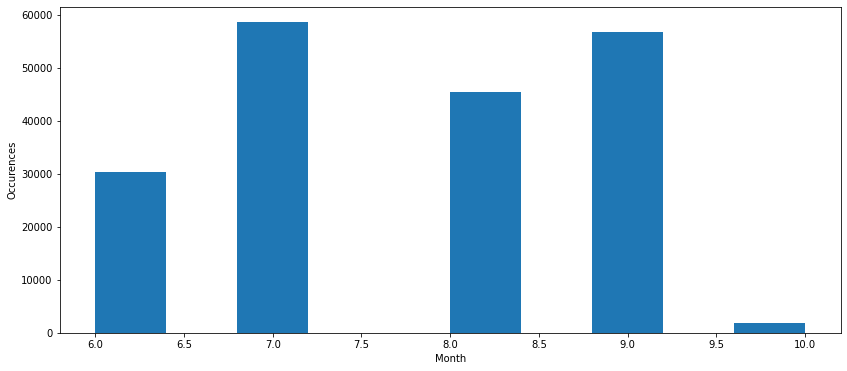

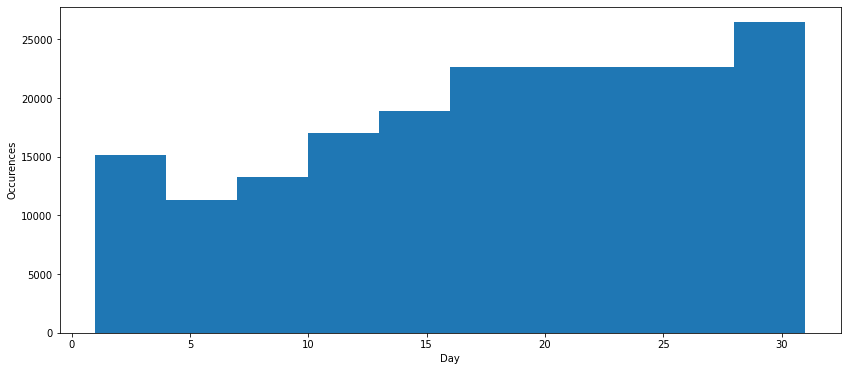

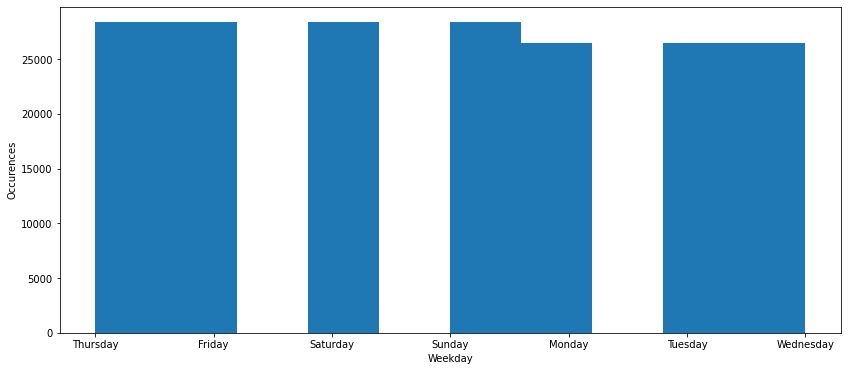

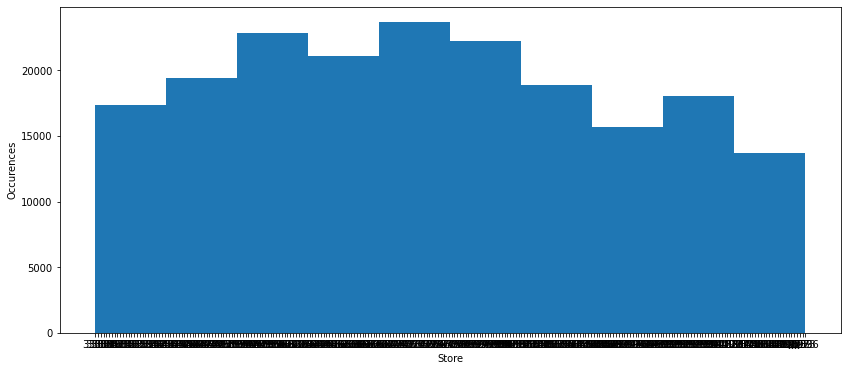

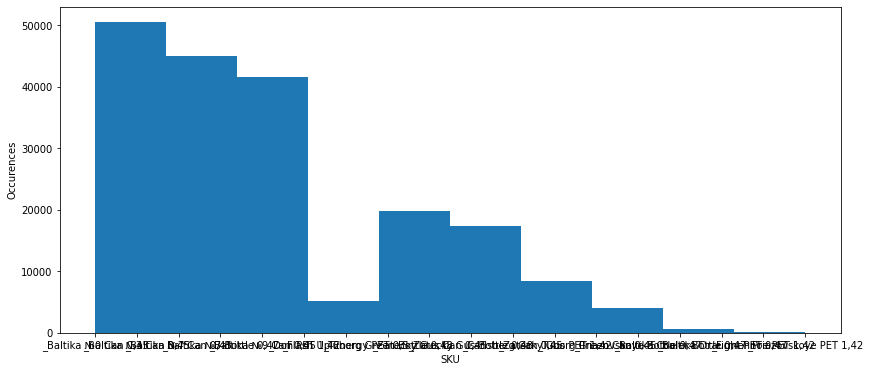

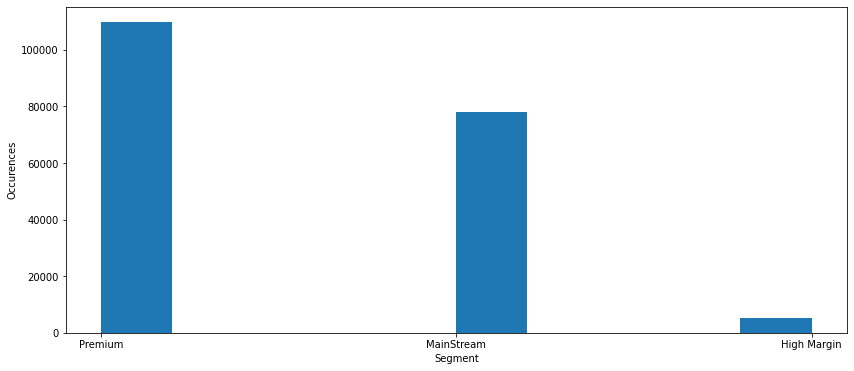

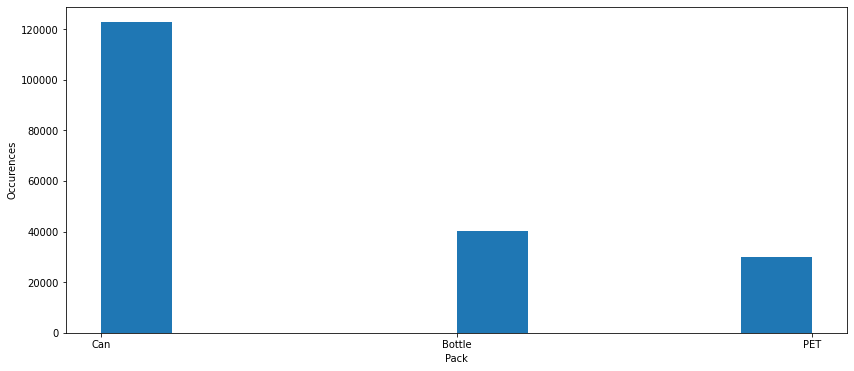

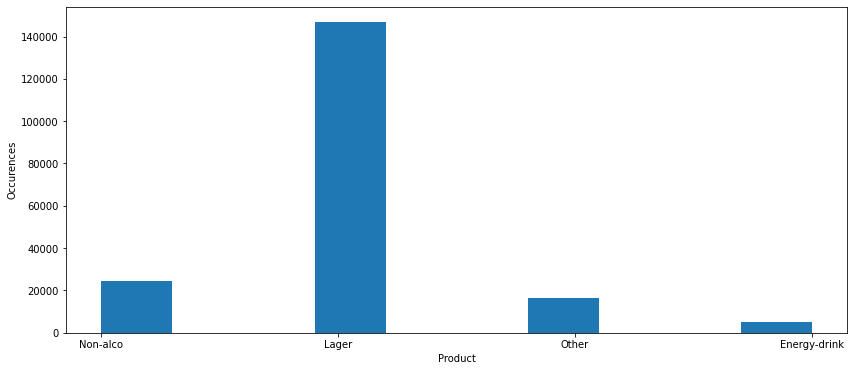

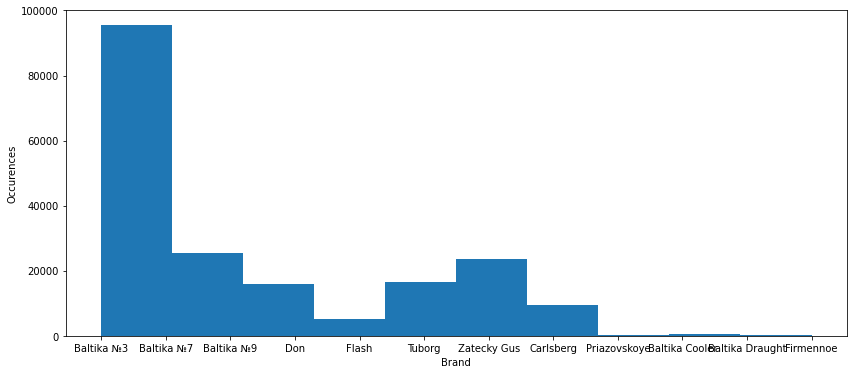

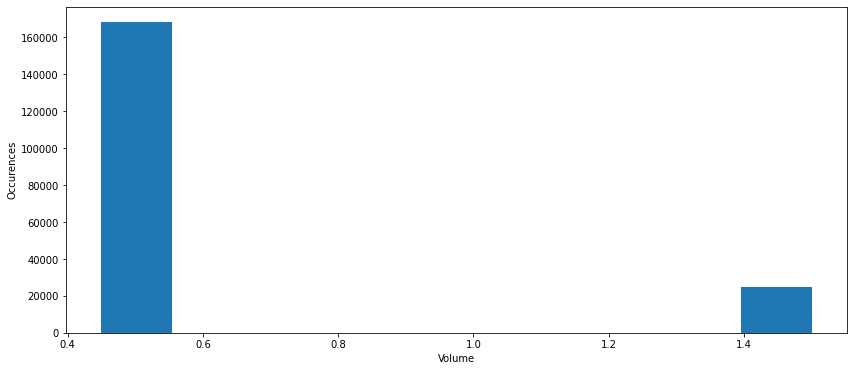

In [20]:
for i in beer_test:
    plt.figure(figsize=(14,6))
    plt.xlabel(i)
    plt.ylabel("Occurences")
    plt.hist(beer_test[i])
    plt.show()

## Sales numbers vs features

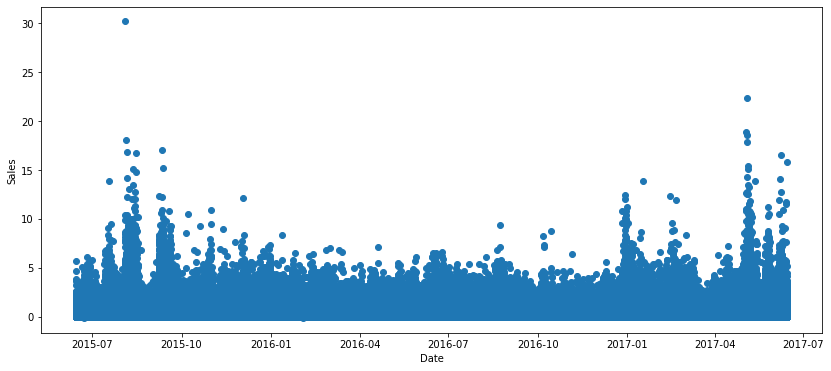

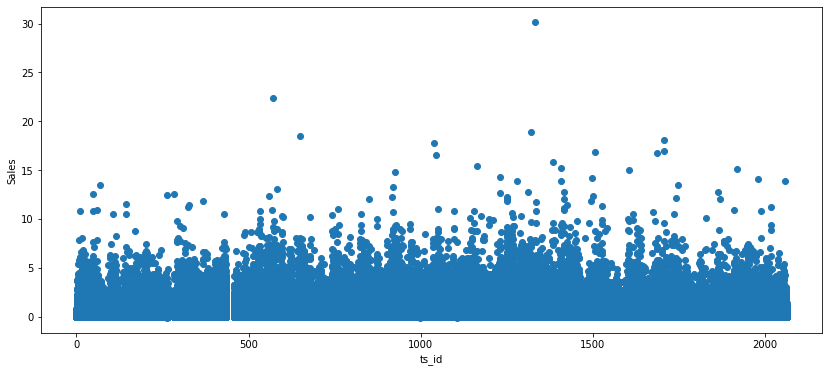

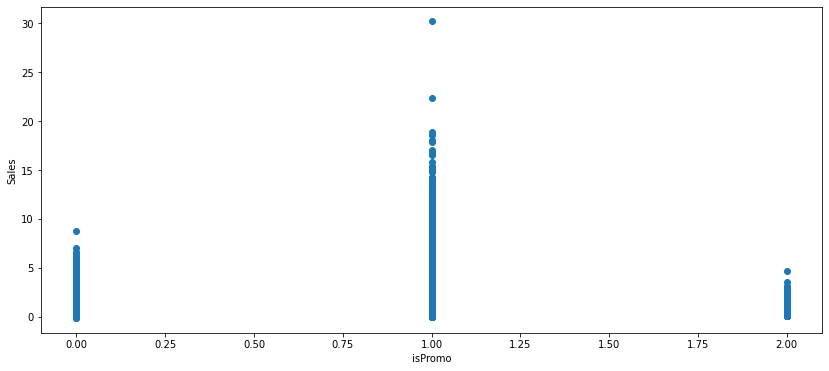

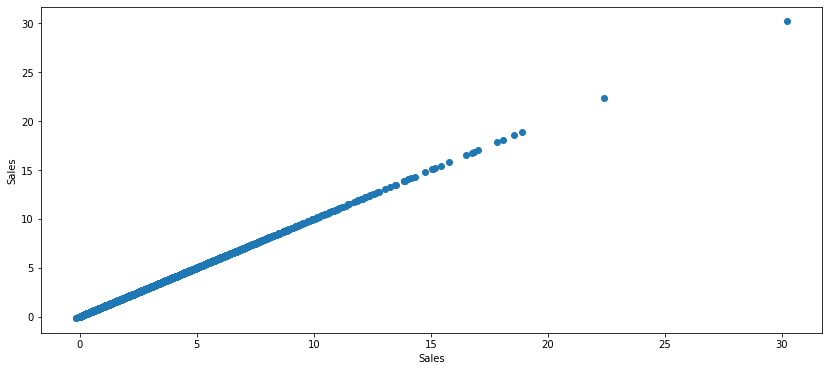

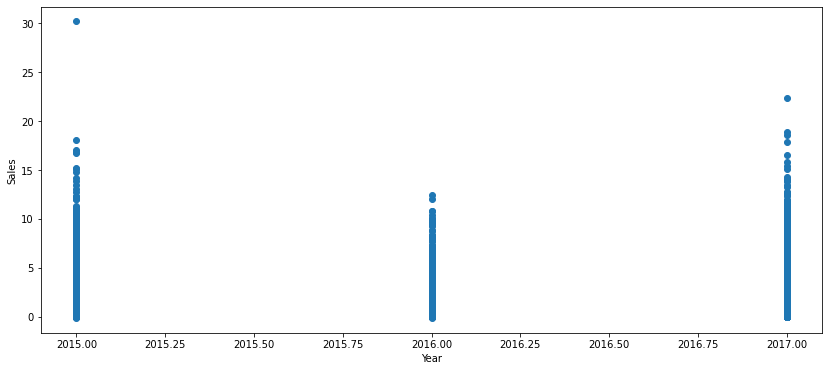

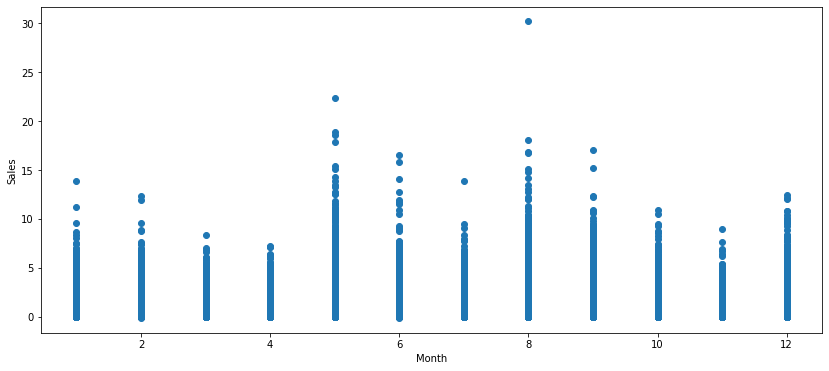

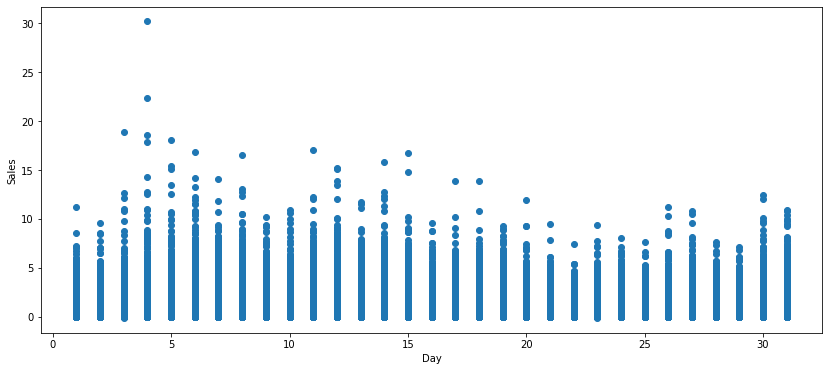

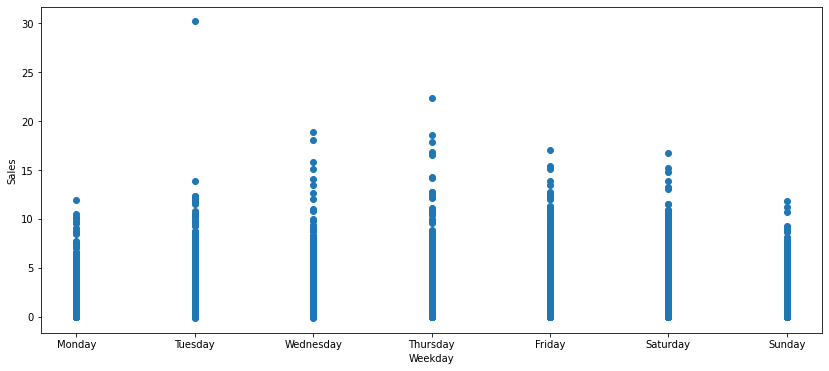

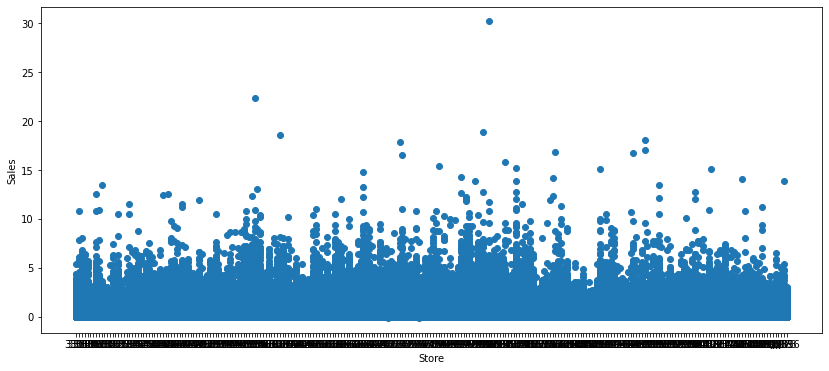

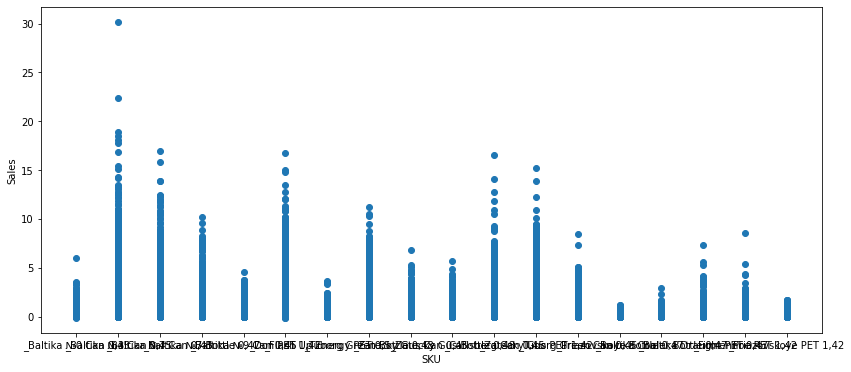

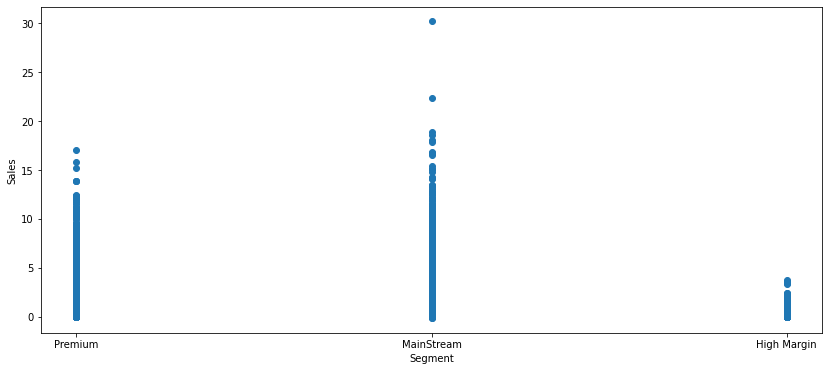

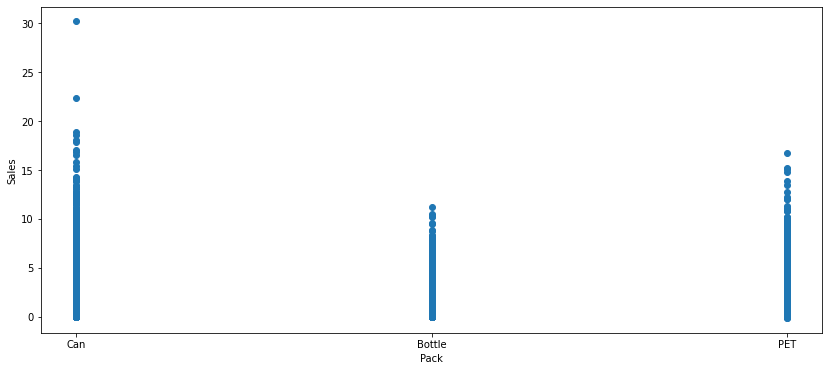

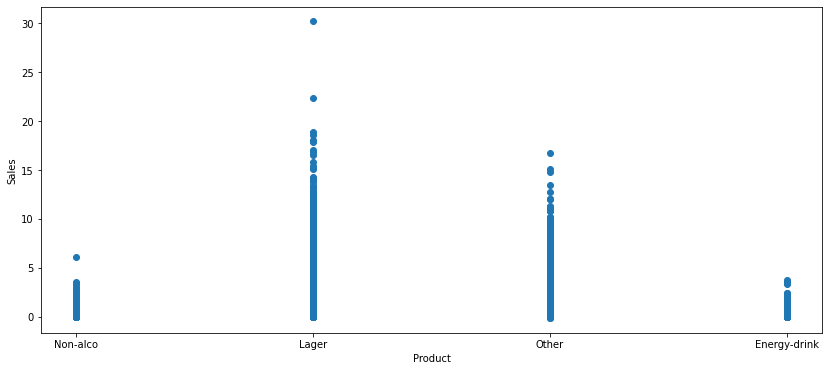

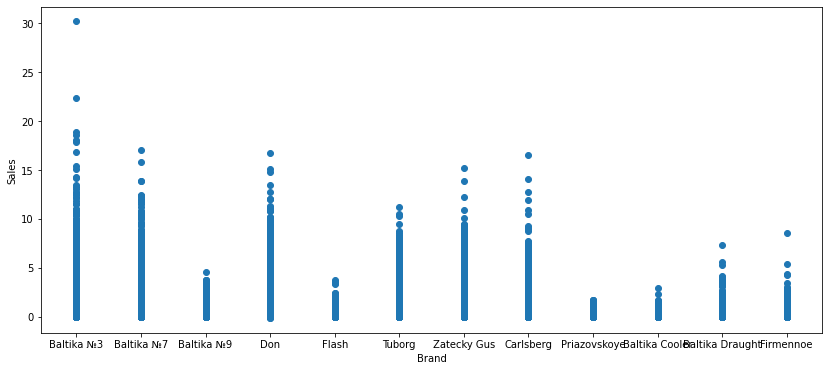

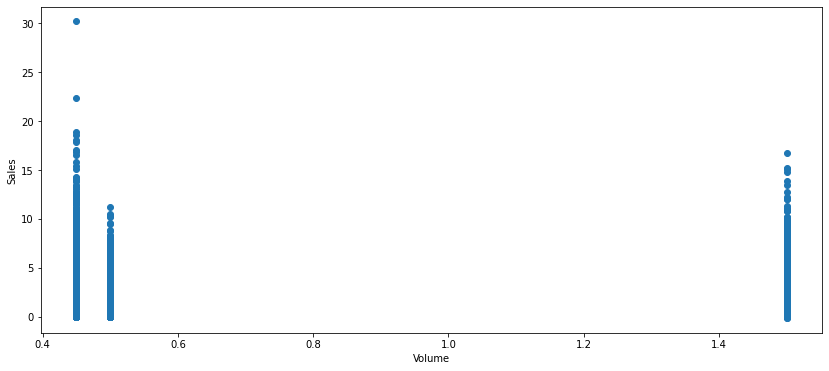

In [21]:
for col in beer_train.columns:
    if col != 'Sales' or col != 'isPromo':
        plt.figure(figsize=(14,6))
        plt.scatter(beer_train[col], beer_train['Sales'])
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

## Correlations

In [24]:
beer_train = pd.get_dummies(beer_train,columns = ['Weekday','Month'])#'SKU','Segment','Pack','Product','Brand','Volume'])


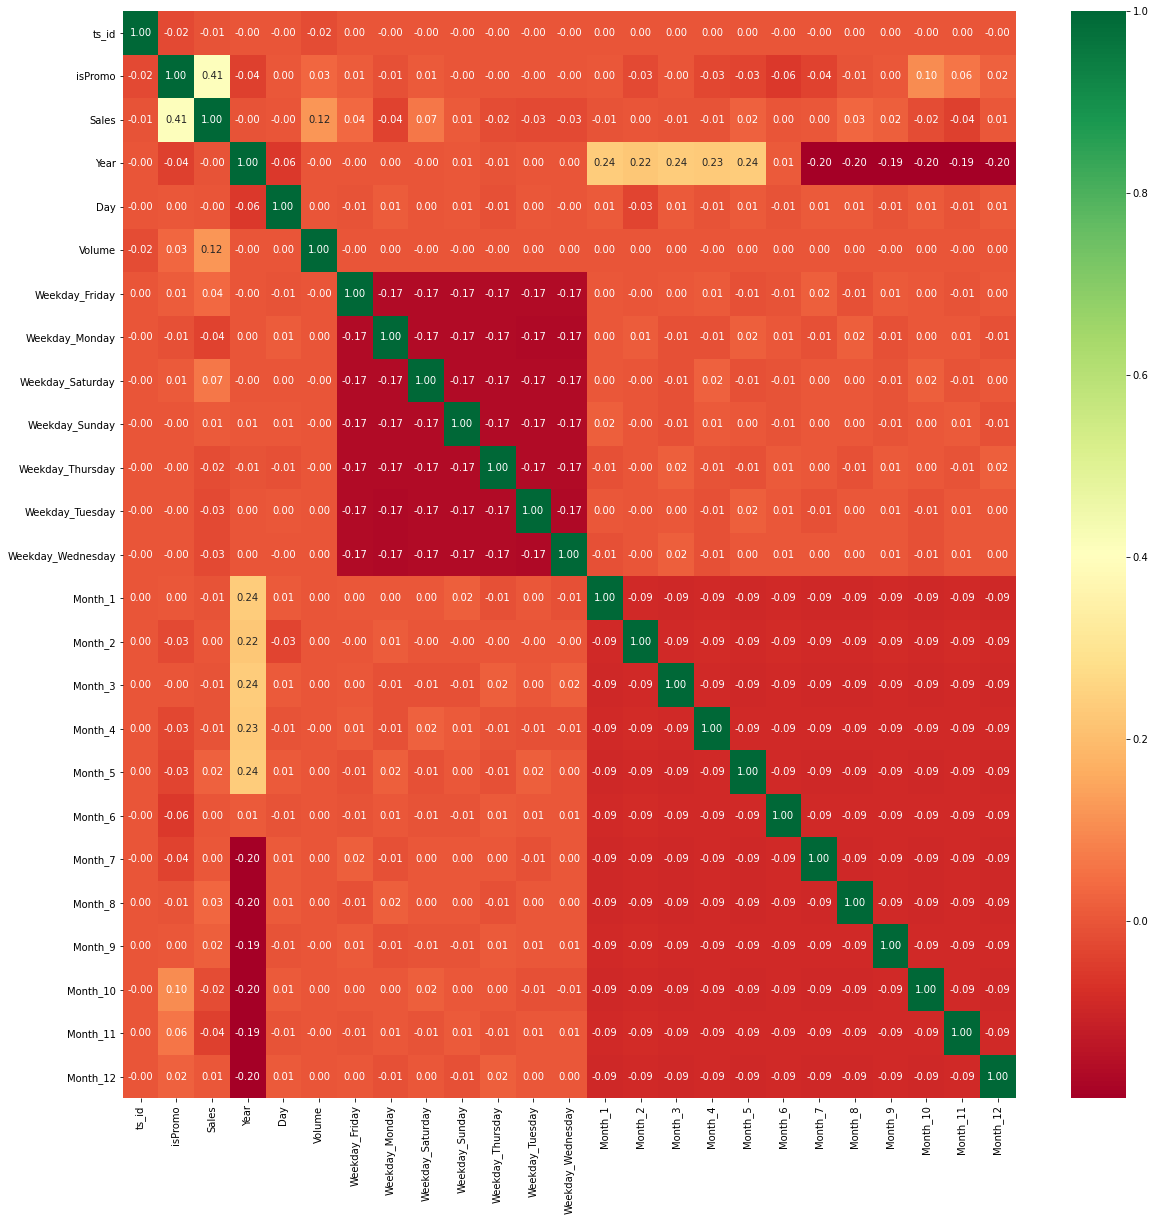

In [25]:
corrmat = beer_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(beer_train[top_corr_features].corr(),annot=True,cmap="RdYlGn",fmt='.2f')

# Checking for same ts_id in both train and test

In [28]:
# checking for duplicates
print(set(beer_train.ts_id)-set(beer_test.ts_id))

set()


# Data preprocessing

In [29]:
# Reading datasets
beer_train = pd.read_csv('beer_train.csv', parse_dates=['Date'])
beer_test = pd.read_csv('beer_test.csv', parse_dates=['Date'])
sku_features = pd.read_csv('sku_features.csv')
id_map = pd.read_csv('id_store_sku.csv')


In [30]:
# Makes it easier to split promo and not promo later
beer_train['Promo_help'] = (beer_train['isPromo']>0)*1
beer_test['Promo_help'] = (beer_test['isPromo']>0)*1

In [31]:
# Transform from timeseries to regression
# Featurize time - keep important information about the date.
# Borrowed from Ruslan's introductory notebook to this task

def generate_features(df, sku_features, id_map):
        
    # Add metadata
    df = pd.merge(df, id_map, how='left', on='ts_id')
    df = pd.merge(df, sku_features, how='left', on='SKU')

    # Time features
    df['day_of_month'] = df['Date'].dt.day
    df['day_of_week'] = df['Date'].dt.weekday
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['week'] = df['Date'].dt.week
    
    # Enlarge promo features
    # Since we know that promo is important
    
    df['ts_promo'] = df['ts_id'].astype(str) + df['isPromo'].astype(str)
    df['store_promo'] = df['Store'].astype(str) + df['isPromo'].astype(str)
    df['segment_promo'] = df['Segment'].astype(str) + df['isPromo'].astype(str)
    df['brand_promo'] = df['Brand'].astype(str) + df['isPromo'].astype(str)
    df['sku_promo'] = df['SKU'].astype(str) + df['isPromo'].astype(str)

    
    return df

In [32]:
beer_train = generate_features(beer_train, sku_features, id_map)
beer_test = generate_features(beer_test, sku_features, id_map)

<ipython-input-31-8a920fed567f>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.week


# Creation of own features

## Days since promo

In [33]:
master_df = pd.DataFrame()
j = 0
for i in beer_train['ts_id'].unique():
    j = j+1
    df = beer_train[beer_train['ts_id']==i]
    df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
    df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
    master_df =  pd.concat([master_df, df['days_since_promo']])
    if j%200==0:
        print(j)
beer_train = pd.concat([beer_train, master_df], axis=1)
beer_train['Days_since_promo'] = beer_train.iloc[:,-1].dt.components.days.astype(int)
beer_train = beer_train.drop(columns=beer_train.iloc[0:0,-2].name)
beer_train.head()

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

200


<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

400


<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

600


<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

800


<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1000


<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1200


<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1400


<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1600


<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1800


<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-33-3be0ca3ad017>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-33-3be0ca3ad017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Date  ts_id  isPromo  Sales  Promo_help Store  \
0 2015-06-15      0      0.0   0.10           0  3301   
1 2015-06-15      1      0.0   0.35           0  3301   
2 2015-06-15      2      1.0   0.60           1  3301   
3 2015-06-15      3      1.0   0.35           1  3301   
4 2015-06-15      4      0.0   0.15           0  3301   

                       SKU     Segment    Pack   Product  ... day_of_week  \
0     _Baltika №0 Can 0,45     Premium     Can  Non-alco  ...           0   
1     _Baltika №3 Can 0,45  MainStream     Can     Lager  ...           0   
2     _Baltika №7 Can 0,45     Premium     Can     Lager  ...           0   
3  _Baltika №7 Bottle 0,47     Premium  Bottle     Lager  ...           0   
4     _Baltika №9 Can 0,45  MainStream     Can     Lager  ...           0   

   month  year  week  ts_promo  store_promo  segment_promo    brand_promo  \
0      6  2015    25      00.0      33010.0     Premium0.0  Baltika №30.0   
1      6  2015    25      10.0      33010.0  MainStream0.0  Baltika №30.0   
2      6  2015    25      21.0      33011.0     Premium1.0  Baltika №71.0   
3      6  2015    25      31.0      33011.0     Premium1.0  Baltika №71.0   
4      6  2015    25      40.0      33010.0  MainStream0.0  Baltika №90.0   

                    sku_promo Days_since_promo  
0     _Baltika №0 Can 0,450.0               62  
1     _Baltika №3 Can 0,450.0               13  
2     _Baltika №7 Can 0,451.0                0  
3  _Baltika №7 Bottle 0,471.0                0  
4     _Baltika №9 Can 0,450.0               58  

[5 rows x 23 columns]

In [34]:
master_df = pd.DataFrame()
j = 0
for i in beer_test['ts_id'].unique():
    j = j+1
    df = beer_test[beer_test['ts_id']==i]
    df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
    df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
    master_df =  pd.concat([master_df, df['days_since_promo']])
    if j%200==0:
        print(j)
beer_test = pd.concat([beer_test, master_df], axis=1)
beer_test.iloc[:,-1] = beer_test.iloc[:,-1].fillna(beer_test.iloc[:,-1].mean())

beer_test['Days_since_promo'] = beer_test.iloc[:,-1].dt.components.days.astype(int)
beer_test = beer_test.drop(columns=beer_test.iloc[0:0,-2].name)
beer_test.head()

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

200


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

400


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

600


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

800


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1000


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1200


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1400


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1600


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

1800


<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['days_since_promo'].fillna(df['days_since_promo'].mean())
<ipython-input-34-d007b341a944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_promo'] = df['Date'] - df['Date'].where(df['Promo_help']==1).ffill()
<ipython-input-34-d007b341a944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

id       Date  ts_id  isPromo  Promo_help Store                      SKU  \
0   0 2017-06-15      0      0.0           0  3301     _Baltika №0 Can 0,45   
1   1 2017-06-15      1      1.0           1  3301     _Baltika №3 Can 0,45   
2   2 2017-06-15      2      1.0           1  3301     _Baltika №7 Can 0,45   
3   3 2017-06-15      3      1.0           1  3301  _Baltika №7 Bottle 0,47   
4   4 2017-06-15      4      0.0           0  3301     _Baltika №9 Can 0,45   

      Segment    Pack   Product  ... day_of_week  month  year  week  ts_promo  \
0     Premium     Can  Non-alco  ...           3      6  2017    24      00.0   
1  MainStream     Can     Lager  ...           3      6  2017    24      11.0   
2     Premium     Can     Lager  ...           3      6  2017    24      21.0   
3     Premium  Bottle     Lager  ...           3      6  2017    24      31.0   
4  MainStream     Can     Lager  ...           3      6  2017    24      40.0   

   store_promo  segment_promo    brand_promo                   sku_promo  \
0      33010.0     Premium0.0  Baltika №30.0     _Baltika №0 Can 0,450.0   
1      33011.0  MainStream1.0  Baltika №31.0     _Baltika №3 Can 0,451.0   
2      33011.0     Premium1.0  Baltika №71.0     _Baltika №7 Can 0,451.0   
3      33011.0     Premium1.0  Baltika №71.0  _Baltika №7 Bottle 0,471.0   
4      33010.0  MainStream0.0  Baltika №90.0     _Baltika №9 Can 0,450.0   

  Days_since_promo  
0               16  
1                0  
2                0  
3                0  
4               44  

[5 rows x 23 columns]

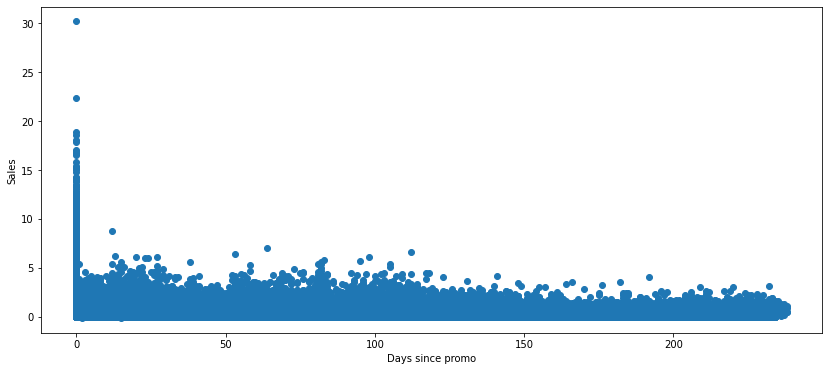

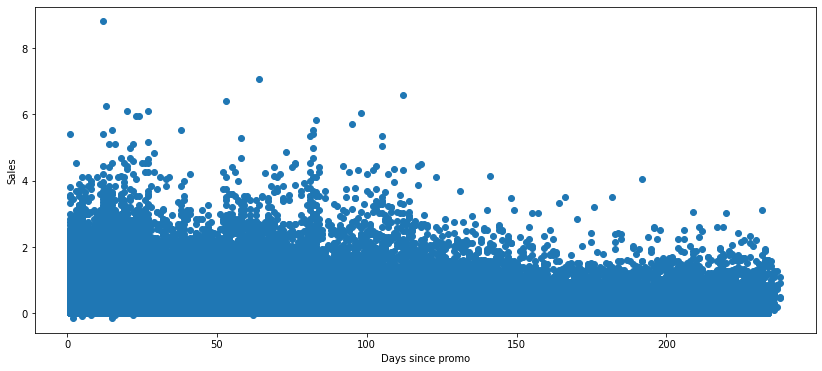

In [35]:
plt.figure(figsize=(14,6))
plt.scatter(beer_train['Days_since_promo'], beer_train['Sales'])
plt.xlabel('Days since promo')
plt.ylabel('Sales')
plt.show()

#Create a plot_df so we don't ruin the beer_train dataframe
plot_df = beer_train[beer_train['Days_since_promo']>0]
plt.figure(figsize=(14,6))
plt.scatter(plot_df['Days_since_promo'], plot_df['Sales'])
plt.xlabel('Days since promo')
plt.ylabel('Sales')
plt.show()

## Promo in Store on other Beer

In [36]:
master_df = pd.DataFrame()
j = 0
for i in beer_train['Store'].unique():
    j = j+1
    df = beer_train[beer_train['Store']==i]
    for i in df['Date'].unique():
        if 1 in df.Promo_help:
            df['Promo_on_other_beer'] = 1 - df['Promo_help'] 
        else:
             df['Promo_on_other_beer'] = 0 
    if j%30==0:
        print(j)
    master_df =  pd.concat([master_df, df['Promo_on_other_beer']])
beer_train = pd.concat([beer_train, master_df], axis=1)
beer_train['Promo_on_other_beer'] = beer_train.iloc[:,-1]
beer_train = beer_train.drop(columns=beer_train.iloc[0:0,-2].name)
beer_train.head()

<ipython-input-36-591323454812>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo_on_other_beer'] = 1 - df['Promo_help']
<ipython-input-36-591323454812>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo_on_other_beer'] = 0


30
60
90
120
150
180
210
240


Date  ts_id  isPromo  Sales  Promo_help Store  \
0 2015-06-15      0      0.0   0.10           0  3301   
1 2015-06-15      1      0.0   0.35           0  3301   
2 2015-06-15      2      1.0   0.60           1  3301   
3 2015-06-15      3      1.0   0.35           1  3301   
4 2015-06-15      4      0.0   0.15           0  3301   

                       SKU     Segment    Pack   Product  ... month  year  \
0     _Baltika №0 Can 0,45     Premium     Can  Non-alco  ...     6  2015   
1     _Baltika №3 Can 0,45  MainStream     Can     Lager  ...     6  2015   
2     _Baltika №7 Can 0,45     Premium     Can     Lager  ...     6  2015   
3  _Baltika №7 Bottle 0,47     Premium  Bottle     Lager  ...     6  2015   
4     _Baltika №9 Can 0,45  MainStream     Can     Lager  ...     6  2015   

   week  ts_promo  store_promo  segment_promo    brand_promo  \
0    25      00.0      33010.0     Premium0.0  Baltika №30.0   
1    25      10.0      33010.0  MainStream0.0  Baltika №30.0   
2    25      21.0      33011.0     Premium1.0  Baltika №71.0   
3    25      31.0      33011.0     Premium1.0  Baltika №71.0   
4    25      40.0      33010.0  MainStream0.0  Baltika №90.0   

                    sku_promo Days_since_promo Promo_on_other_beer  
0     _Baltika №0 Can 0,450.0               62                 1.0  
1     _Baltika №3 Can 0,450.0               13                 1.0  
2     _Baltika №7 Can 0,451.0                0                 0.0  
3  _Baltika №7 Bottle 0,471.0                0                 0.0  
4     _Baltika №9 Can 0,450.0               58                 1.0  

[5 rows x 24 columns]

In [37]:
master_df = pd.DataFrame()
j = 0
for i in beer_test['Store'].unique():
    j = j+1
    df = beer_test[beer_test['Store']==i]
    df['Promo_on_other_beer'] = np.NaN
    for i in df['Date'].unique():
        if 1 in df.Promo_help:
            df['Promo_on_other_beer'] = 1 - df['Promo_help'] 
        else:
             df['Promo_on_other_beer'] = 0 
    if j%30==0:
        print(j)
    master_df =  pd.concat([master_df, df['Promo_on_other_beer']])
beer_test = pd.concat([beer_test, master_df], axis=1)
beer_test['Promo_on_other_beer'] = beer_test.iloc[:,-1]
beer_test = beer_test.drop(columns=beer_test.iloc[0:0,-2].name)
beer_test.head()

<ipython-input-37-6117407faf9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo_on_other_beer'] = np.NaN
<ipython-input-37-6117407faf9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo_on_other_beer'] = 1 - df['Promo_help']
<ipython-input-37-6117407faf9d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

30
60
90
120
150
180
210
240


id       Date  ts_id  isPromo  Promo_help Store                      SKU  \
0   0 2017-06-15      0      0.0           0  3301     _Baltika №0 Can 0,45   
1   1 2017-06-15      1      1.0           1  3301     _Baltika №3 Can 0,45   
2   2 2017-06-15      2      1.0           1  3301     _Baltika №7 Can 0,45   
3   3 2017-06-15      3      1.0           1  3301  _Baltika №7 Bottle 0,47   
4   4 2017-06-15      4      0.0           0  3301     _Baltika №9 Can 0,45   

      Segment    Pack   Product  ... month  year  week  ts_promo  store_promo  \
0     Premium     Can  Non-alco  ...     6  2017    24      00.0      33010.0   
1  MainStream     Can     Lager  ...     6  2017    24      11.0      33011.0   
2     Premium     Can     Lager  ...     6  2017    24      21.0      33011.0   
3     Premium  Bottle     Lager  ...     6  2017    24      31.0      33011.0   
4  MainStream     Can     Lager  ...     6  2017    24      40.0      33010.0   

   segment_promo    brand_promo                   sku_promo Days_since_promo  \
0     Premium0.0  Baltika №30.0     _Baltika №0 Can 0,450.0               16   
1  MainStream1.0  Baltika №31.0     _Baltika №3 Can 0,451.0                0   
2     Premium1.0  Baltika №71.0     _Baltika №7 Can 0,451.0                0   
3     Premium1.0  Baltika №71.0  _Baltika №7 Bottle 0,471.0                0   
4  MainStream0.0  Baltika №90.0     _Baltika №9 Can 0,450.0               44   

  Promo_on_other_beer  
0                 1.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 1.0  

[5 rows x 24 columns]

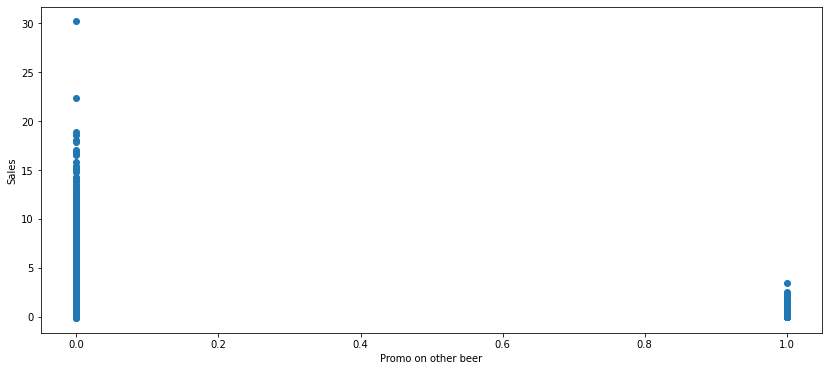

In [38]:
plt.figure(figsize=(14,6))
plt.scatter(beer_train['Promo_on_other_beer'], beer_train['Sales'])
plt.xlabel('Promo on other beer')
plt.ylabel('Sales')
plt.show()

# Promo on same SKU in another store 

In [39]:
master_df = pd.DataFrame()
j = 0
for i in beer_train['SKU'].unique():
    j = j+1
    df = beer_train[beer_train['SKU']==i]
    df['promo_in_other_store'] = 0

    for k in df['Date'].unique():
        df.loc[df['Date'] == k,'promo_in_other_store'] = df.loc[df['Date']==k,'Promo_help'].sum()

    master_df =  pd.concat([master_df, df['promo_in_other_store']])

    print(j)
beer_train = pd.concat([beer_train, master_df], axis=1)
beer_train['promo_in_other_store'] = beer_train.iloc[:,-1]
beer_train = beer_train.drop(columns=beer_train.iloc[0:0,-2].name)
beer_train.head()

<ipython-input-39-452ef6d9accb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['promo_in_other_store'] = 0
c:\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


Date  ts_id  isPromo  Sales  Promo_help Store  \
0 2015-06-15      0      0.0   0.10           0  3301   
1 2015-06-15      1      0.0   0.35           0  3301   
2 2015-06-15      2      1.0   0.60           1  3301   
3 2015-06-15      3      1.0   0.35           1  3301   
4 2015-06-15      4      0.0   0.15           0  3301   

                       SKU     Segment    Pack   Product  ...  year  week  \
0     _Baltika №0 Can 0,45     Premium     Can  Non-alco  ...  2015    25   
1     _Baltika №3 Can 0,45  MainStream     Can     Lager  ...  2015    25   
2     _Baltika №7 Can 0,45     Premium     Can     Lager  ...  2015    25   
3  _Baltika №7 Bottle 0,47     Premium  Bottle     Lager  ...  2015    25   
4     _Baltika №9 Can 0,45  MainStream     Can     Lager  ...  2015    25   

   ts_promo  store_promo  segment_promo    brand_promo  \
0      00.0      33010.0     Premium0.0  Baltika №30.0   
1      10.0      33010.0  MainStream0.0  Baltika №30.0   
2      21.0      33011.0     Premium1.0  Baltika №71.0   
3      31.0      33011.0     Premium1.0  Baltika №71.0   
4      40.0      33010.0  MainStream0.0  Baltika №90.0   

                    sku_promo Days_since_promo Promo_on_other_beer  \
0     _Baltika №0 Can 0,450.0               62                 1.0   
1     _Baltika №3 Can 0,450.0               13                 1.0   
2     _Baltika №7 Can 0,451.0                0                 0.0   
3  _Baltika №7 Bottle 0,471.0                0                 0.0   
4     _Baltika №9 Can 0,450.0               58                 1.0   

  promo_in_other_store  
0                  0.0  
1                  0.0  
2                178.0  
3                137.0  
4                  0.0  

[5 rows x 25 columns]

In [40]:
master_df = pd.DataFrame()
j = 0
for i in beer_test['SKU'].unique():
    j = j+1
    df = beer_test[beer_test['SKU']==i]
    df['promo_in_other_store'] = 0
    for k in df['Date'].unique():
        df.loc[df['Date'] == k,'promo_in_other_store'] = df.loc[df['Date']==k,'Promo_help'].sum()

    master_df =  pd.concat([master_df, df['promo_in_other_store']])

    print(j)
beer_test = pd.concat([beer_test, master_df], axis=1)
beer_test['promo_in_other_store'] = beer_test.iloc[:,-1]
beer_test = beer_test.drop(columns=beer_test.iloc[0:0,-2].name)
beer_test.head()

<ipython-input-40-19f5ae9e0ab7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['promo_in_other_store'] = 0
c:\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


id       Date  ts_id  isPromo  Promo_help Store                      SKU  \
0   0 2017-06-15      0      0.0           0  3301     _Baltika №0 Can 0,45   
1   1 2017-06-15      1      1.0           1  3301     _Baltika №3 Can 0,45   
2   2 2017-06-15      2      1.0           1  3301     _Baltika №7 Can 0,45   
3   3 2017-06-15      3      1.0           1  3301  _Baltika №7 Bottle 0,47   
4   4 2017-06-15      4      0.0           0  3301     _Baltika №9 Can 0,45   

      Segment    Pack   Product  ...  year  week  ts_promo  store_promo  \
0     Premium     Can  Non-alco  ...  2017    24      00.0      33010.0   
1  MainStream     Can     Lager  ...  2017    24      11.0      33011.0   
2     Premium     Can     Lager  ...  2017    24      21.0      33011.0   
3     Premium  Bottle     Lager  ...  2017    24      31.0      33011.0   
4  MainStream     Can     Lager  ...  2017    24      40.0      33010.0   

   segment_promo    brand_promo                   sku_promo Days_since_promo  \
0     Premium0.0  Baltika №30.0     _Baltika №0 Can 0,450.0               16   
1  MainStream1.0  Baltika №31.0     _Baltika №3 Can 0,451.0                0   
2     Premium1.0  Baltika №71.0     _Baltika №7 Can 0,451.0                0   
3     Premium1.0  Baltika №71.0  _Baltika №7 Bottle 0,471.0                0   
4  MainStream0.0  Baltika №90.0     _Baltika №9 Can 0,450.0               44   

  Promo_on_other_beer promo_in_other_store  
0                 1.0                  0.0  
1                 0.0                162.0  
2                 0.0                248.0  
3                 0.0                179.0  
4                 1.0                  0.0  

[5 rows x 25 columns]

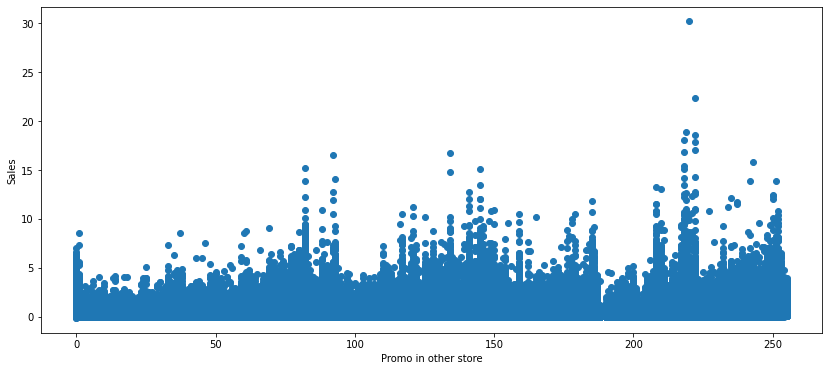

In [41]:
plt.figure(figsize=(14,6))
plt.scatter(beer_train['promo_in_other_store'], beer_train['Sales'])
plt.xlabel('Promo in other store')
plt.ylabel('Sales')
plt.show()

## Promo on beers in other stores

In [42]:
j = 0

beer_train['total_promo'] = 0

for k in beer_train['Date'].unique():
    beer_train.loc[beer_train['Date'] == k,'total_promo'] = beer_train.loc[beer_train['Date']==k,'Promo_help'].sum()
    j= j+1
    if j%100==0:
        print(j)

print(j)

beer_train.head()

100
200
300
400
500
600
700
731


Date  ts_id  isPromo  Sales  Promo_help Store  \
0 2015-06-15      0      0.0   0.10           0  3301   
1 2015-06-15      1      0.0   0.35           0  3301   
2 2015-06-15      2      1.0   0.60           1  3301   
3 2015-06-15      3      1.0   0.35           1  3301   
4 2015-06-15      4      0.0   0.15           0  3301   

                       SKU     Segment    Pack   Product  ... week  ts_promo  \
0     _Baltika №0 Can 0,45     Premium     Can  Non-alco  ...   25      00.0   
1     _Baltika №3 Can 0,45  MainStream     Can     Lager  ...   25      10.0   
2     _Baltika №7 Can 0,45     Premium     Can     Lager  ...   25      21.0   
3  _Baltika №7 Bottle 0,47     Premium  Bottle     Lager  ...   25      31.0   
4     _Baltika №9 Can 0,45  MainStream     Can     Lager  ...   25      40.0   

   store_promo  segment_promo    brand_promo                   sku_promo  \
0      33010.0     Premium0.0  Baltika №30.0     _Baltika №0 Can 0,450.0   
1      33010.0  MainStream0.0  Baltika №30.0     _Baltika №3 Can 0,450.0   
2      33011.0     Premium1.0  Baltika №71.0     _Baltika №7 Can 0,451.0   
3      33011.0     Premium1.0  Baltika №71.0  _Baltika №7 Bottle 0,471.0   
4      33010.0  MainStream0.0  Baltika №90.0     _Baltika №9 Can 0,450.0   

   Days_since_promo Promo_on_other_beer promo_in_other_store total_promo  
0                62                 1.0                  0.0         506  
1                13                 1.0                  0.0         506  
2                 0                 0.0                178.0         506  
3                 0                 0.0                137.0         506  
4                58                 1.0                  0.0         506  

[5 rows x 26 columns]

In [43]:
j = 0

beer_test['total_promo'] = 0

for k in beer_test['Date'].unique():
    beer_test.loc[beer_test['Date'] == k,'total_promo'] = beer_test.loc[beer_test['Date']==k,'Promo_help'].sum()
    j= j+1
    if j%100==0:
        print(j)

print(j)

beer_test.head()

100
102


id       Date  ts_id  isPromo  Promo_help Store                      SKU  \
0   0 2017-06-15      0      0.0           0  3301     _Baltika №0 Can 0,45   
1   1 2017-06-15      1      1.0           1  3301     _Baltika №3 Can 0,45   
2   2 2017-06-15      2      1.0           1  3301     _Baltika №7 Can 0,45   
3   3 2017-06-15      3      1.0           1  3301  _Baltika №7 Bottle 0,47   
4   4 2017-06-15      4      0.0           0  3301     _Baltika №9 Can 0,45   

      Segment    Pack   Product  ... week  ts_promo  store_promo  \
0     Premium     Can  Non-alco  ...   24      00.0      33010.0   
1  MainStream     Can     Lager  ...   24      11.0      33011.0   
2     Premium     Can     Lager  ...   24      21.0      33011.0   
3     Premium  Bottle     Lager  ...   24      31.0      33011.0   
4  MainStream     Can     Lager  ...   24      40.0      33010.0   

   segment_promo    brand_promo                   sku_promo  Days_since_promo  \
0     Premium0.0  Baltika №30.0     _Baltika №0 Can 0,450.0                16   
1  MainStream1.0  Baltika №31.0     _Baltika №3 Can 0,451.0                 0   
2     Premium1.0  Baltika №71.0     _Baltika №7 Can 0,451.0                 0   
3     Premium1.0  Baltika №71.0  _Baltika №7 Bottle 0,471.0                 0   
4  MainStream0.0  Baltika №90.0     _Baltika №9 Can 0,450.0                44   

  Promo_on_other_beer promo_in_other_store total_promo  
0                 1.0                  0.0         650  
1                 0.0                162.0         650  
2                 0.0                248.0         650  
3                 0.0                179.0         650  
4                 1.0                  0.0         650  

[5 rows x 26 columns]

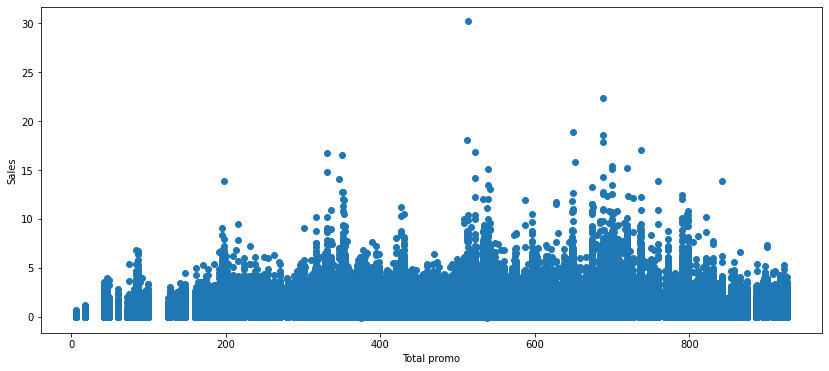

In [44]:
plt.figure(figsize=(14,6))
plt.scatter(beer_train['total_promo'], beer_train['Sales'])
plt.xlabel('Total promo')
plt.ylabel('Sales')
plt.show()

In [45]:
org_data_train = beer_train
org_data_test = beer_test

In [51]:
#for reloading:
beer_train = org_data_train
beer_test = org_data_test

## Sales boosting while on promo

In [96]:
#make array with all unique ts_id's
array = [beer_train['ts_id'].unique()][0]

#make df with columns: ts_id, 2x, 1x, 0x
promo_boost = pd.DataFrame(columns = ['ts_id'], dtype=object)
promo_boost['ts_id'] = array

for i in range(len(array)):
    #one product, one store
    df = beer_train[beer_train.ts_id==array[i]]
    #make dataframe for each promo level
    double_promo = df[df.isPromo==2]
    promo = df[df.isPromo==1]
    no_promo = df[df.isPromo==0]
    
    #average of the different promo levels
    mean_double = double_promo['Sales'].mean()
    mean_single = promo['Sales'].mean()
    mean_none = no_promo['Sales'].mean()

    #link averages and ts_id
    promo_boost.loc[promo_boost['ts_id']==array[i],'sales_boost_promo2x'] = (mean_double/mean_none)
    promo_boost.loc[promo_boost['ts_id']==array[i],'sales_boost_promo'] =  (mean_single/mean_none)
    promo_boost.loc[promo_boost['ts_id']==array[i],'normalized_sales'] = 1

promo_boost.to_csv('promo_boost.csv',index=False)

promo_boost

ts_id  sales_boost_promo2x  sales_boost_promo  normalized_sales
0         0                  NaN           1.556749               1.0
1         1                  NaN           2.329113               1.0
2         2             4.779080           4.446383               1.0
3         3             2.905399           3.864795               1.0
4         4                  NaN           1.602411               1.0
...     ...                  ...                ...               ...
1886   2059                  NaN           2.167720               1.0
1887   2060                  NaN           1.310641               1.0
1888   2061                  NaN           4.853336               1.0
1889   2062             6.808413           4.040837               1.0
1890   2063                  NaN           1.520069               1.0

[1891 rows x 4 columns]

Minimum promo boost: 0.38827080127825775
Maximal promo boost: 11.392638028649248


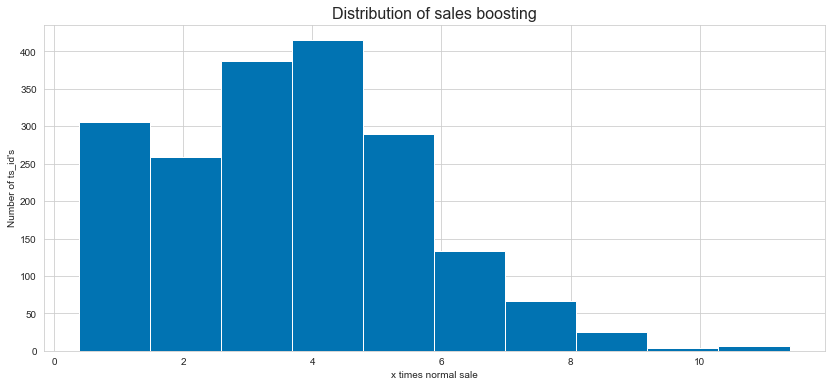

In [107]:
plt.figure(figsize=(14,6))
promo_boost.sales_boost_promo.hist()
plt.ylabel("Number of ts_id's")
plt.xlabel("x times normal sale")
plt.title("Distribution of sales boosting", fontsize=16)

print("Minimum promo boost:", promo_boost.sales_boost_promo.min())
print("Maximal promo boost:", promo_boost.sales_boost_promo.max())

AttributeError: 'DataFrame' object has no attribute 'sales_boost_promo2x'

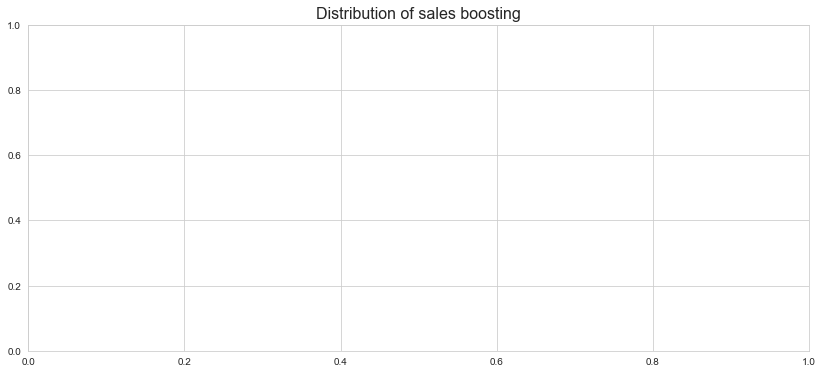

In [170]:
plt.figure(figsize=(14,6))
plt.scatter(promo_boost.sales_boost_promo, promo_boost.sales_boost_promo2x)
plt.title("Comparing boost at 2x promo and 1x promo")
plt.xlabel("Boost, 1x promo")
plt.ylabel("Boost, 2x promo")

print("Minimum promo boost:", promo_boost.sales_boost_promo2x.min())
print("Maximal promo boost:", promo_boost.sales_boost_promo2x.max())
print("Occurences where 2x is worse than 1x:", promo_boost[promo_boost.sales_boost_promo > promo_boost.sales_boost_promo2x].ts_id.count())

## Using LGBM and Catboost pred to make some features

In [52]:
arr = ['ts_id', 'Store', 'SKU', 'Segment', 'Pack', 'Product',
       'Brand', 'Volume', 'day_of_week', 'month',
       'week', 'ts_promo', 'store_promo', 'segment_promo', 'brand_promo',
       'sku_promo']
for c in arr:
    beer_test[c] = beer_test[c].astype('category')
    beer_train[c] = beer_train[c].astype('category')

In [53]:
train_features = beer_train
test_features = beer_test

train_features_promo = train_features[train_features['isPromo']>0]
test_features_promo = test_features[test_features['isPromo']>0]

train_features = train_features[train_features['isPromo']==0]
test_features = test_features[test_features['isPromo']==0]

test_features['isPromo'] = test_features['isPromo'].astype('category')
train_features['isPromo'] = train_features['isPromo'].astype('category')

test_features_promo['isPromo'] = test_features_promo['isPromo'].astype('category')
train_features_promo['isPromo'] = train_features_promo['isPromo'].astype('category')



train_y_promo = train_features_promo['Sales']
train_y = train_features['Sales']
del(train_features_promo['Sales'], train_features_promo['Date'])
del(train_features['Sales'], train_features['Date'])

id_tag = test_features['id']
id_tag_promo = test_features_promo['id']

del(test_features['Date'], test_features['id'])
del(test_features_promo['Date'], test_features_promo['id'])

<ipython-input-53-776625cd3b03>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['isPromo'] = test_features['isPromo'].astype('category')
<ipython-input-53-776625cd3b03>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['isPromo'] = train_features['isPromo'].astype('category')
<ipython-input-53-776625cd3b03>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [54]:
import lightgbm as lgb
params= {'n_estimators': 5000, 'learning_rate': 0.01, 'num_leaves': 1980, 'max_depth': 10, 'min_child_samples': 1800, 'max_bin': 200, 'reg_alpha': 95, 'reg_lambda': 5, 
         'min_split_gain': 4.908999802253177, 'subsample': 0.7000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.95}
master_df = pd.DataFrame(columns=['id', 'Sales'])
model = lgb.LGBMRegressor(**params,random_state=42)
model.fit(train_features,train_y)
prediction = model.predict(test_features)
dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

In [58]:
params = {'n_estimators': 850, 'learning_rate': 0.008, 'num_leaves': 560, 'max_depth': 9, 'min_child_samples': 200, 'max_bin': 285, 'reg_alpha': 30, 
          'reg_lambda': 70, 'min_split_gain': 2.7956030162894496, 'subsample': 0.45, 'subsample_freq': 1, 'colsample_bytree': 0.45}
model_promo = lgb.LGBMRegressor(**params,random_state=42)
model_promo.fit(train_features_promo, train_y_promo)

prediction = model_promo.predict(test_features_promo)
dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

In [59]:
beer_train['id'] = beer_train.index+1

## Ignore next 3 boxes

In [77]:
beer_train = pd.merge(beer_train, lightGBM_train,on='id')
beer_test = pd.merge(beer_test ,lightGBM_test,on='id')

NameError: name 'lightGBM_train' is not defined

In [ ]:
StartDate = beer_train.Date-  pd.to_timedelta(7, unit='D') 
EndDate= beer_train.Date
beer_train['StartDate'] = StartDate
beer_train['EndDate']= EndDate
beer_train['sold_last_week'] = beer_trai3n.apply(lambda x: beer_train.loc[(beer_train.Date >= x.StartDate) & (beer_train.Date <= x.EndDate), 'Sales'].sum(),axis=1)
beer_train = beer_train.drop(columns=['StartDate','EndDate'])

In [ ]:
StartDate = beer_test.Date-  pd.to_timedelta(7, unit='D') 
EndDate= beer_test.Date
beer_test['StartDate'] = StartDate
beer_test['EndDate']= EndDate
beer_test['sold_last_week'] = beer_test.apply(lambda x: beer_test.loc[(beer_test.Date >= x.StartDate) & (beer_test.Date <= x.EndDate), 'Sales_pred'].sum(),axis=1)
beer_test = beer_test.drop(columns=['StartDate','EndDate'])

## Holidays

In [62]:
holidays = pd.read_csv('holidays2.csv')

In [68]:
beer_train['is_holiday'] = (beer_train['Date'].isin(np.array(holidays['holidays'])))*1
beer_test['is_holiday'] = (beer_test['Date'].isin(np.array(holidays['holidays'])))*1

In [69]:
beer_test['is_holiday'] = 0

beer_train['days_from_holiday'] = beer_train['Date'] - beer_train['Date'].where(beer_train['is_holiday']==1).ffill()
beer_test['days_from_holiday'] = beer_test['Date'] - np.datetime64('2017-06-12')

beer_train['days_from_holiday'] = beer_train['days_from_holiday'].fillna(beer_train['days_from_holiday'].mean())
beer_train['days_from_holiday'] = beer_train.iloc[:,-1].dt.components.days.astype(int)

beer_test['days_from_holiday'] = beer_test['days_from_holiday'].fillna(beer_test['days_from_holiday'].mean())
beer_test['days_from_holiday'] = beer_test.iloc[:,-1].dt.components.days.astype(int)

beer_train['days_to_holiday'] = beer_train['Date'].where(beer_train['is_holiday']==1).bfill() - beer_train['Date']
beer_test['days_to_holiday'] = np.datetime64('2017-11-02') - beer_test['Date']

beer_train['days_to_holiday'] = beer_train['days_to_holiday'].fillna(beer_train['days_to_holiday'].mean())
beer_train['days_to_holiday'] = beer_train.iloc[:,-1].dt.components.days.astype(int)

beer_test['days_to_holiday'] = beer_test['days_to_holiday'].fillna(beer_test['days_to_holiday'].mean())
beer_test['days_to_holiday'] = beer_test.iloc[:,-1].dt.components.days.astype(int)

beer_train['days_from_holiday'].describe()

beer_train.to_csv('latest_train_with_holiday.csv',index=False)
beer_test.to_csv('latest_test_with_holiday.csv',index=False)

# Models

## Feature engineering

## Model interpretation 

# LightGBM

In [70]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

## Hyperparameter tuning

In [ ]:
def objective(trial):
    param = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100,500,1000,2500]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 200, 10000, step=100),
        "max_bin": trial.suggest_int("max_bin", 200, 300,step=5),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 100, step=5),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 100, step=5),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 15),
        "subsample": trial.suggest_float("subsample", 0.4, 0.95, step=0.1),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [1]),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 0.95, step=0.1),
        'metric':'rmse'}

        #'num_iterations': 200,
        #'early_stopping_rounds': 20}
    model = lgb.LGBMRegressor(**param,silent=True)  
    cv = TimeSeriesSplit(n_splits=10)
    score = cross_val_score(model,beer_train, train_y, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

## First solution to find important variables

In [81]:
beer_train = pd.read_csv("latest_train_with_holiday.csv")
beer_test = pd.read_csv("latest_test_with_holiday.csv")
beer_train = beer_train.drop(columns=['StartDate','EndDate'])

beer_train['id'] = beer_train.index+1

beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]

id_tag2_promo = beer_train_promo['id']
id_tag2 = beer_train['id']

arr = ['ts_id', 'Store','Segment', 'SKU', 'Pack', 'Product',
       'Brand', 'day_of_week', 'month','week']
#droping everything that has something to do wiht promo, and Sales_pred as it dominates the solution
drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo',
       'sku_promo','day_of_month']
for c in arr:
    beer_train[c] = beer_train[c].astype('category')
    beer_test[c] = beer_test[c].astype('category')
    
beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = ['ts_id', 'Store', 'SKU','day_of_week', 'month',
       'week', 'ts_promo', 'store_promo', 'brand_promo','sku_promo']
#dropping variables we do not have faith in, and see that have low prediction in our first LGBM for making the sales_pred and sales_last_week variable
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Product']
for c in arr:
    beer_train_promo[c] = beer_train_promo[c].astype('category')
    beer_test_promo[c] = beer_test_promo[c].astype('category')

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)

train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
del(beer_train_promo['Sales'], beer_train_promo['Date'],beer_train_promo['id'])
del(beer_train['Sales'], beer_train['Date'],beer_train['id'])
dates_test=beer_test[['Date','id']]
dates_test_promo = beer_test_promo[['Date','id']]
del(beer_test['Date'])
del(beer_test_promo['Date'])

<AxesSubplot:>

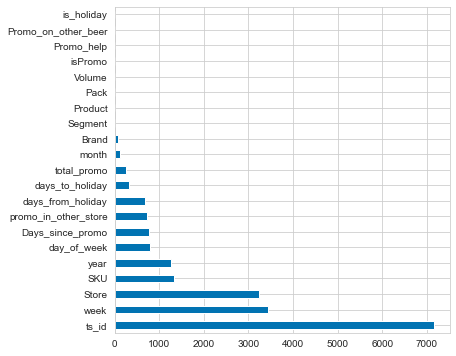

In [82]:
id_tag = beer_test['id']
id_tag_promo = beer_test_promo['id']
del(beer_test['id'])
del(beer_test_promo['id'])

params= {'n_estimators': 5000, 'learning_rate': 0.01, 'num_leaves': 1980, 'max_depth': 10, 'min_child_samples': 1800, 'max_bin': 200, 'reg_alpha': 95, 'reg_lambda': 5, 
         'min_split_gain': 4.908999802253177, 'subsample': 0.7000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.95}
master_df = pd.DataFrame(columns=['id', 'Sales_pred'])
model = lgb.LGBMRegressor(**params,random_state=42)
model.fit(beer_train,train_y)
prediction = model.predict(beer_test)
dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

#We see here that ts_id and Sales_pred is dominating. As well as 'Promo_help','isPromo','Promo_on_other_beer' sold_last_week, having low prediction power so we drop them for later tries
feat_imp = pd.Series(model.feature_importances_, index=beer_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

<AxesSubplot:>

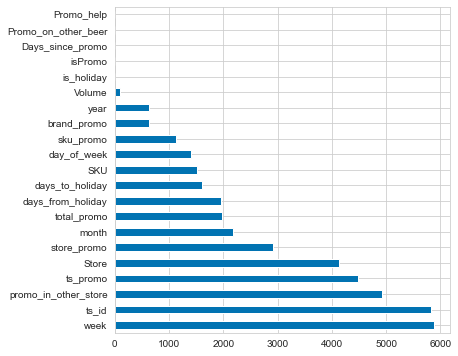

In [83]:
params = {'n_estimators': 850, 'learning_rate': 0.008, 'num_leaves': 560, 'max_depth': 9, 'min_child_samples': 200, 'max_bin': 285, 'reg_alpha': 30, 
          'reg_lambda': 70, 'min_split_gain': 2.7956030162894496, 'subsample': 0.45, 'subsample_freq': 1, 'colsample_bytree': 0.45}
model_promo = lgb.LGBMRegressor(**params,random_state=42)
model_promo.fit(beer_train_promo,train_y_promo)

prediction = model_promo.predict(beer_test_promo)
dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)


master_df['id'] = master_df['id'].astype(int)

#see here that #'ts_id','Pack','is_holiday','Promo_on_other_beer','Promo_help','Days_since_promo' sold_last_week, week has low prediction power so we drop them for later tries
feat_imp = pd.Series(model_promo.feature_importances_, index=beer_train_promo.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

## Best solution

In [ ]:
beer_train = pd.read_csv('latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('latest_test_with_holiday.csv', parse_dates=['Date'])

beer_train['id'] = beer_train.index+1

beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]

id_tag2_promo = beer_train_promo['id']
id_tag2 = beer_train['id']

arr = ['Store','Segment', 'SKU', 'Pack', 'Product',
       'Brand', 'day_of_week', 'month','week'] #ts_id
drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo','is_holiday','Pack',
       'sku_promo','day_of_month','Sales_pred','ts_id','Promo_help','isPromo','Promo_on_other_beer','sold_last_week']
#'ts_id','Promo_help','isPromo','Promo_on_other_beer' sold_last_week, week
for c in arr:
    beer_train[c] = beer_train[c].astype('category')
    beer_test[c] = beer_test[c].astype('category')
    
beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = ['Store', 'SKU','day_of_week', 'month',
       'week', 'ts_promo', 'store_promo', 'brand_promo','sku_promo'] #ts_id
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Product','Sales_pred','ts_id','Pack','is_holiday',
       'Promo_on_other_beer','Promo_help','Days_since_promo','sold_last_week'] 
#'ts_id','Pack','is_holiday','Promo_on_other_beer','Promo_help','Days_since_promo' sold_last_week, week
for c in arr:
    beer_train_promo[c] = beer_train_promo[c].astype('category')
    beer_test_promo[c] = beer_test_promo[c].astype('category')

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)

train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
del(beer_train_promo['Sales'], beer_train_promo['Date'],beer_train_promo['id'])
del(beer_train['Sales'], beer_train['Date'],beer_train['id'])
dates_test=beer_test[['Date','id']]
dates_test_promo = beer_test_promo[['Date','id']]
del(beer_test['Date'])
del(beer_test_promo['Date'])

def objective(trial):
    param = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100,500,1000,2500]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 200, 10000, step=100),
        "max_bin": trial.suggest_int("max_bin", 200, 300,step=5),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 100, step=5),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 100, step=5),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 15),
        "subsample": trial.suggest_float("subsample", 0.4, 0.95, step=0.1),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [1]),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 0.95, step=0.1),
        'metric':'rmse'}

        #'num_iterations': 200,
        #'early_stopping_rounds': 20}
    model = lgb.LGBMRegressor(**param,silent=True)  
    cv = TimeSeriesSplit(n_splits=10)
    score = cross_val_score(model,beer_train, train_y, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finisiihed trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

id_tag = beer_test['id']
id_tag_promo = beer_test_promo['id']
del(beer_test['id'])
del(beer_test_promo['id'])
#this is the best params from the above hyperparameter tuning
params= {'n_estimators': 5000, 'learning_rate': 0.01, 'num_leaves': 1980, 'max_depth': 10, 'min_child_samples': 1800, 'max_bin': 200, 'reg_alpha': 95, 'reg_lambda': 5, 
         'min_split_gain': 4.908999802253177, 'subsample': 0.7000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.95} 
master_df = pd.DataFrame(columns=['id', 'Sales'])
model = lgb.LGBMRegressor(**params,random_state=42)
model.fit(beer_train,train_y)
prediction = model.predict(beer_test)
dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)


feat_imp = pd.Series(model.feature_importances_, index=beer_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

def objective_promo(trial):
    param = {"n_estimators": trial.suggest_categorical("n_estimators", [100,500,1000,2500]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 200, 10000, step=100),
        "max_bin": trial.suggest_int("max_bin", 200, 300,step=5),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 100, step=5),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 100, step=5),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 15),
        "subsample": trial.suggest_float("subsample", 0.4, 0.95, step=0.1),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [1]),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 0.95, step=0.1),
        'metric':'rmse'}
        #'num_iterations': 200,
        #'early_stopping_rounds': 20}
    model = lgb.LGBMRegressor(**param,silent=True)  
    cv = TimeSeriesSplit(n_splits=10)
    score = cross_val_score(model,beer_train_promo, train_y_promo, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective_promo, n_trials=10)
#best params form the best above hyperparameter tuning 
params = {'n_estimators': 850, 'learning_rate': 0.008, 'num_leaves': 560, 'max_depth': 9, 'min_child_samples': 200, 'max_bin': 285, 'reg_alpha': 30, 
          'reg_lambda': 70, 'min_split_gain': 2.7956030162894496, 'subsample': 0.45, 'subsample_freq': 1, 'colsample_bytree': 0.45}

model_promo = lgb.LGBMRegressor(**params,random_state=42)
model_promo.fit(beer_train_promo,train_y_promo)

prediction = model_promo.predict(beer_test_promo)
dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)


master_df['id'] = master_df['id'].astype(int)

master_df.to_csv('light_GBM_hyperparameter_jorgen_try_2.csv', index=False)

master_df.shape

feat_imp = pd.Series(model_promo.feature_importances_, index=beer_train_promo.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

for i in beer_train_promo:
    print(i,len(beer_train_promo[i].unique()))

for i in beer_train:
    print(i,len(beer_train[i].unique()))

# Scaling for conf. cup and a student festival 

master_df.shape

dates_id = pd.concat([dates_test,dates_test_promo])
dates_id.shape

master_df = pd.merge(master_df,dates_id,on='id')
master_df.shape

master_df['Date'] = master_df['Date'].astype(str)
master_df['Date'].dtype

#this is the dates of the confidration cup happening i Sochi. We didn't find any happenings similar to this in the
#training period so we manually adjusted for this 
d1 = np.datetime64('2017-06-17')
arr = [d1.astype(str)]
for i in range(1,16):
    day = d1+np.timedelta64(i,'D')
    arr.append(day.astype(str))

master_df.loc[master_df['Date'].isin(arr),'Sales'] = master_df.loc[master_df['Date'].isin(arr),'Sales']*1.23


master_df = master_df.drop(columns=['Date'])
master_df.to_csv('light_GBM_hyperparameter_jorgen_trys_scale_2.csv', index=False)

feat_imp = pd.Series(model.feature_importances_, index=beer_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

feat_imp = pd.Series(model_promo.feature_importances_, index=beer_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6)

# Next best

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set_style("whitegrid")
sns.set_palette("colorblind")
import lightgbm as lgb

# from matplotlib import rc
# rc('font',**{'family':'sans-serif'})
# rc('axes', **{'titlesize': '8', 'labelsize': '6'})
# rc('legend', **{'fontsize': '6'})
# rc('figure', **{'dpi' : 200})
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

beer_train = pd.read_csv('../Data_preprocessing/latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('../Data_preprocessing/latest_test_with_holiday.csv', parse_dates=['Date'])

beer_train['id'] = beer_train.index+1

beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]

id_tag2_promo = beer_train_promo['id']
id_tag2 = beer_train['id']

arr = ['Store','Segment', 'SKU', 'Pack', 'Product',
       'Brand', 'day_of_week', 'month','week'] #ts_id
drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo','is_holiday','Pack',
       'sku_promo','day_of_month','Sales_pred']
for c in arr:
    beer_train[c] = beer_train[c].astype('category')
    beer_test[c] = beer_test[c].astype('category')
    
beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = ['Store', 'SKU','day_of_week', 'month',
       'week', 'ts_promo', 'store_promo', 'brand_promo','sku_promo'] #ts_id
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Product','Sales_pred'] 
#'ts_id','Pack','is_holiday','Promo_on_other_beer','Promo_help','Days_since_promo' sold_last_week, week
for c in arr:
    beer_train_promo[c] = beer_train_promo[c].astype('category')
    beer_test_promo[c] = beer_test_promo[c].astype('category')

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)

train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
del(beer_train_promo['Sales'], beer_train_promo['Date'],beer_train_promo['id'])
del(beer_train['Sales'], beer_train['Date'],beer_train['id'])
dates_test=beer_test[['Date','id']]
dates_test_promo = beer_test_promo[['Date','id']]
del(beer_test['Date'])
del(beer_test_promo['Date'])


id_tag = beer_test['id']
id_tag_promo = beer_test_promo['id']
del(beer_test['id'])
del(beer_test_promo['id'])

params= {'n_estimators': 5000, 'learning_rate': 0.01, 'num_leaves': 1980, 'max_depth': 10, 'min_child_samples': 1800, 'max_bin': 200, 'reg_alpha': 95, 'reg_lambda': 5, 
         'min_split_gain': 4.908999802253177, 'subsample': 0.7000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.95}
master_df = pd.DataFrame(columns=['id', 'Sales'])
model = lgb.LGBMRegressor(**params,random_state=42)
model.fit(beer_train,train_y)
prediction = model.predict(beer_test)
dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)


feat_imp = pd.Series(model.feature_importances_, index=beer_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))


study.optimize(objective_promo, n_trials=2)

params = {'n_estimators': 850, 'learning_rate': 0.008, 'num_leaves': 560, 'max_depth': 9, 'min_child_samples': 200, 'max_bin': 285, 'reg_alpha': 30, 
          'reg_lambda': 70, 'min_split_gain': 2.7956030162894496, 'subsample': 0.45, 'subsample_freq': 1, 'colsample_bytree': 0.45}
model_promo = lgb.LGBMRegressor(**params,random_state=42)
model_promo.fit(beer_train_promo,train_y_promo)

prediction = model_promo.predict(beer_test_promo)
dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)


master_df['id'] = master_df['id'].astype(int)

master_df.to_csv('light_GBM_hyperparameter_jorgen_try_2.csv', index=False)

master_df.shape

feat_imp = pd.Series(model_promo.feature_importances_, index=beer_train_promo.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

for i in beer_train_promo:
    print(i,len(beer_train_promo[i].unique()))

for i in beer_train:
    print(i,len(beer_train[i].unique()))

# Scaling for conf. cup and a student festival 

master_df.shape

dates_id = pd.concat([dates_test,dates_test_promo])

dates_id.shape

master_df = pd.merge(master_df,dates_id,on='id')

master_df.shape

master_df['Date'] = master_df['Date'].astype(str)

master_df['Date'].dtype

d1 = np.datetime64('2017-06-17')
arr = [d1.astype(str)]
for i in range(1,16):
    day = d1+np.timedelta64(i,'D')
    arr.append(day.astype(str))

master_df.loc[master_df['Date'].isin(arr),'Sales'] = master_df.loc[master_df['Date'].isin(arr),'Sales']*1.23


master_df = master_df.drop(columns=['Date'])
master_df.to_csv('light_GBM_hyperparameter_jorgen_trys_scale_2.csv', index=False)

## Trying for each ts_id

In [ ]:
beer_train['Store'] = beer_train['Store'].astype(str)
beer_test['Store'] = beer_test['Store'].astype(str)

print(set(beer_train['Store'].unique())-set(beer_test['Store'].unique()))

print(set(beer_test['Store'].unique())-set(beer_train['Store'].unique()))

for i in beer_train:
    if '№' in i:
        i_2 = i.replace('№','No')
        beer_train[i_2] = beer_train[i]
        beer_train = beer_train.drop(columns=[i],axis=1)
        i=i_2
for i in beer_train:
    if ',' in i:
        i_2 = i.replace(',','.')
        beer_train[i_2] = beer_train[i]
        beer_train = beer_train.drop(columns=[i],axis=1)
    
for i in beer_test:
    if '№' in i:
        i_2 = i.replace('№','No')
        beer_test[i_2] = beer_test[i]
        beer_test = beer_test.drop(columns=[i],axis=1)
        i=i_2
for i in beer_test:       
    if ',' in i:
        i_2 = i.replace(',','.')
        beer_test[i_2] = beer_test[i]
        beer_test = beer_test.drop(columns=[i],axis=1)

beer_train.shape

beer_test.shape

def objective(trial):
    param = {
        "objective": "regression",
        "metric": "root_mean_squared_error",
        'feature_pre_filter': trial.suggest_categorical('feature_pre_filter',[False,True]),
         "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-6, 2),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-6, 2),
        'num_leaves': trial.suggest_int("num_leaves", 20, 3000, step=20), 
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        'feature_fraction': trial.suggest_categorical('feature_fraction', [0.4,0.5,0.6,0.7,0.8,1.0]), 
        'bagging_fraction': trial.suggest_categorical('bagging_fraction', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'bagging_freq' : trial.suggest_int('min_child_samples', 1, 10), 
        'min_child_samples': trial.suggest_int('bagging_freq', 1, 100),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]), 
        'n_estimators': trial.suggest_int('n_estimators', 100,10000,step=100),
        'max_bin':trial.suggest_int("max_bin", 200, 300),
        'max_depth': trial.suggest_int('max_depth', 4,12),
        'min_gain_to_split':  trial.suggest_float("min_gain_to_split", 0, 15)}
        #'num_iterations': 200,
        #'early_stopping_rounds': 20}
    model = LGBMRegressor(**param)  
    cv = TimeSeriesSplit(n_splits=6)
    score = cross_val_score(model,X_train, y, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

master_df= pd.DataFrame(columns=['id', 'Sales'])
for i in beer_train['Store'].unique():
    print('Store: ',i)
    X_train = beer_train[beer_train['Store']==i]
    y = X_train['Sales']
    X_train = X_train.drop(columns=['Sales','Date','Store','ts_id','Year','Day','id'],axis=1)
    X_test = beer_test[beer_test['Store']==i]
    id_tag = X_test['id']
    X_test = X_test.drop(columns=['Date','Store','ts_id','Year','Day','id'],axis=1)
    print(X_test.shape)
    print(X_train.shape)
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=3)
    model = LGBMRegressor(**study.best_trial.params)
    model.fit(X_train,y)
    prediction = model.predict(X_test)
    dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
    master_df =  pd.concat([master_df, dataset], ignore_index=True)

master_df.head()
master_df.to_csv('LightGBM_one_for_each_store.csv',index=False)

## New way of handling promo

In [ ]:
# Reading datasets
beer_train = pd.read_csv('latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('latest_test_with_holiday.csv', parse_dates=['Date'])
promo_boost = pd.read_csv('../promo_boost.csv')

In [ ]:
promo_boost = promo_boost.drop(columns=['sales_boost_promo2x'])

promo_boost.head()

beer_train = pd.merge(beer_train,promo_boost,on='ts_id')

beer_test = pd.merge(beer_test,promo_boost,on='ts_id')

scale = (beer_test['isPromo']>0)*beer_test['sales_boost_promo']

scale = scale.replace(0,1)

In [ ]:
arr = ['Store','Segment', 'SKU', 'Pack', 'Product',
       'Brand', 'day_of_week', 'month','week','store_promo', 'brand_promo','sku_promo'] #ts_id
drop = ['day_of_month','Brand','segment_promo','Sales_pred','ts_id','Pack','is_holiday',
       'Promo_on_other_beer','Promo_help','Days_since_promo','sold_last_week','ts_promo']
#'ts_id','Promo_help','isPromo','Promo_on_other_beer' sold_last_week, week <-- with this was previous best
for c in arr:
    beer_train[c] = beer_train[c].astype('category')
    beer_test[c] = beer_test[c].astype('category')
    
beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

In [ ]:
train_y = beer_train['Sales']

del(beer_train['Sales'], beer_train['Date'],beer_train['id'])
dates_test=beer_test[['Date','id']]

del(beer_test['Date'])

In [ ]:
id_tag = beer_test['id']
del(beer_test['id'])

In [ ]:
params= {'n_estimators': 5000, 'learning_rate': 0.01, 'num_leaves': 1980, 'max_depth': 10, 'min_child_samples': 1800, 'max_bin': 200, 'reg_alpha': 95, 'reg_lambda': 5, 
         'min_split_gain': 4.908999802253177, 'subsample': 0.7000000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.95}
master_df = pd.DataFrame(columns=['id', 'Sales'])
model = lgb.LGBMRegressor(**params,random_state=42)
model.fit(beer_train,train_y)
prediction = model.predict(beer_test)
dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

In [ ]:
master_df.shape

master_df = pd.merge(master_df,dates_test,on='id')
master_df.shape

master_df['Date'] = master_df['Date'].astype(str)
master_df['Date'].dtype

d1 = np.datetime64('2017-06-17')
arr = [d1.astype(str)]
for i in range(1,16):
    day = d1+np.timedelta64(i,'D')
    arr.append(day.astype(str))

master_df.loc[master_df['Date'].isin(arr),'Sales'] = master_df.loc[master_df['Date'].isin(arr),'Sales']*1.23

In [ ]:
master_df = master_df.drop(columns=['Date'])
master_df.head()

In [ ]:
master_df.to_csv('LGBM_anotherway_of_promo.csv',index=False)

# XGBoost

## First try, quite bad

In [ ]:
# import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# from matplotlib import rc
# rc('font',**{'family':'sans-serif'})
# rc('axes', **{'titlesize': '8', 'labelsize': '6'})
# rc('legend', **{'fontsize': '6'})
# rc('figure', **{'dpi' : 200})
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
from xgboost import XGBRegressor

import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)

from sklearn.metrics import mean_squared_error
#Crossvaludation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

# Reading datasets
beer_train = pd.read_csv('../Data_preprocessing/latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('../Data_preprocessing/latest_test_with_holiday.csv', parse_dates=['Date'])

beer_train['month'] = beer_train['month'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)

beer_train['month'] = beer_train['month'].astype(int)
beer_train['week'] = beer_train['week'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)
beer_train['day_of_week'] = beer_train['day_of_week'].astype(int)
beer_train['Store'] = beer_train['Store'].astype(str)


beer_test['month'] = beer_test['month'].astype(int)
beer_test['week'] = beer_test['week'].astype(int)
beer_test['month'] = beer_test['month'].astype(int)
beer_test['day_of_week'] = beer_test['day_of_week'].astype(int)
beer_test['Store'] = beer_test['Store'].astype(str)

weeks = beer_test.week.unique()

print(weeks)

beer_train['week'] = beer_train.week.apply(lambda x: (x in weeks)*x)

beer_train['week'] = beer_train['week'].astype(int)


beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]


arr = ['Brand', 'day_of_week', 'month','week','SKU','Product']

drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo','Segment','Date','Pack','Store',
       'sku_promo','day_of_month', 'ts_promo','Sales_pred','ts_id','isPromo','Promo_help','is_holiday','Promo_on_other_beer']

beer_train = pd.get_dummies(beer_train, columns= arr)
beer_test = pd.get_dummies(beer_test, columns= arr)



beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = ['SKU','day_of_week', 'month','week','Product','sku_promo','brand_promo']      
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Sales_pred','ts_id','ts_promo','Store',
       'is_holiday','Promo_help','Days_since_promo','Promo_on_other_beer','Pack','Date','store_promo']

beer_train_promo = pd.get_dummies(beer_train_promo, columns= arr)
beer_test_promo = pd.get_dummies(beer_test_promo, columns= arr)

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)



for e in beer_train:
    if e not in beer_test:
        beer_test[e] = 0
        
beer_test.head()
for e in beer_test:
    if e not in beer_train:
        beer_train[e] = 0

for e in beer_train_promo:
    if e not in beer_test_promo:
        beer_test_promo[e] = 0
        

for e in beer_test_promo:
    if e not in beer_train_promo:
        beer_train_promo[e] = 0

train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
#del(beer_train_promo['Sales'], beer_train_promo['Date'])
del(beer_train['Sales'])

#del(beer_test['Date'])
#del(beer_test_promo['Date'])
id_tag = beer_test['id']
id_tag_promo = beer_test_promo['id']
del(beer_test['id'])
del(beer_test_promo['id'])

master_df= pd.DataFrame(columns=['id', 'Sales'])

model = xgb.XGBRegressor(reg_lambda=5,reg_alpha=2,subsample=0.85,
                        learning_rate=0.01,max_depth=10,n_estimators=500,
                        min_child_weight=150)
model.fit(beer_train,train_y)
prediction = model.predict(beer_test)
dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

beer_test_promo.head()

beer_test_promo['id'] = beer_test_promo.index +1

model1 = xgb.XGBRegressor(reg_lambda=5,reg_alpha=2,subsample=0.85,
                        learning_rate=0.01,max_depth=10,n_estimators=500,
                        min_child_weight=150)
model1.fit(beer_train_promo,train_y_promo)
beer_test_promo = beer_test_promo[beer_train_promo.columns]
prediction = model1.predict(beer_test_promo)
dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

master_df.to_csv('submission_XG.csv',index=False)

## One model for each store and separate by promo

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# from matplotlib import rc
# rc('font',**{'family':'sans-serif'})
# rc('axes', **{'titlesize': '8', 'labelsize': '6'})
# rc('legend', **{'fontsize': '6'})
# rc('figure', **{'dpi' : 200})
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
from xgboost import XGBRegressor

import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)

from sklearn.metrics import mean_squared_error
#Crossvaludation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

# Reading datasets
beer_train = pd.read_csv('../Data_preprocessing/latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('../Data_preprocessing/latest_test_with_holiday.csv', parse_dates=['Date'])

beer_train['month'] = beer_train['month'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)

beer_train['month'] = beer_train['month'].astype(int)
beer_train['week'] = beer_train['week'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)
beer_train['day_of_week'] = beer_train['day_of_week'].astype(int)
beer_train['Store'] = beer_train['Store'].astype(str)


beer_test['month'] = beer_test['month'].astype(int)
beer_test['week'] = beer_test['week'].astype(int)
beer_test['month'] = beer_test['month'].astype(int)
beer_test['day_of_week'] = beer_test['day_of_week'].astype(int)
beer_test['Store'] = beer_test['Store'].astype(str)

weeks = beer_test.week.unique()

print(weeks)

beer_train['week'] = beer_train.week.apply(lambda x: (x in weeks)*x)

beer_train['week'] = beer_train['week'].astype(int)


beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]


arr = ['Brand', 'day_of_week', 'month','week','SKU','Product']

drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo','Segment','Date','Pack',
       'sku_promo','day_of_month', 'ts_promo','Sales_pred','ts_id','isPromo','Promo_help','is_holiday','Promo_on_other_beer']

beer_train = pd.get_dummies(beer_train, columns= arr)
beer_test = pd.get_dummies(beer_test, columns= arr)



beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = ['SKU','day_of_week', 'month','week','Product','sku_promo','brand_promo']      
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Sales_pred','ts_id','ts_promo',
       'is_holiday','Promo_help','Days_since_promo','Promo_on_other_beer','Pack','Date','store_promo']

beer_train_promo = pd.get_dummies(beer_train_promo, columns= arr)
beer_test_promo = pd.get_dummies(beer_test_promo, columns= arr)

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)



for e in beer_train:
    if e not in beer_test:
        beer_test[e] = 0
        
beer_test.head()
for e in beer_test:
    if e not in beer_train:
        beer_train[e] = 0

for e in beer_train_promo:
    if e not in beer_test_promo:
        beer_test_promo[e] = 0
        

for e in beer_test_promo:
    if e not in beer_train_promo:
        beer_train_promo[e] = 0

def objective(trial):
  
    param = {
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        #'freature_pre_filter': trial.suggest_categorical('freature_pre_filter',[True,False]),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 5.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 5),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,0.85,0.9,0.95]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100,250,500,1000,2000]),
        'max_depth': trial.suggest_int('max_depth', 3,10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 299,step=2),
        'random_state':42}
    model = xgb.XGBRegressor(**param)  
    cv = TimeSeriesSplit(n_splits=5)
    score = cross_val_score(model,X_train, y, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

master_df= pd.DataFrame(columns=['id', 'Sales'])
j=0
for i in beer_train['Store'].unique():
    j= j+1
    print('Store: ',i, 'Progress: ', j/256)
    X_train = beer_train[beer_train['Store']==i]
    
    y = X_train['Sales']
    X_train = X_train.drop(columns=['Store','Sales'])
    X_test = beer_test[beer_test['Store']==i]
    id_tag = X_test['id']
    X_test = X_test.drop(columns=['Store','Sales'])
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)
    model = xgb.XGBRegressor(**study.best_trial.params)
    model.fit(X_train,y)
    prediction = model.predict(X_test)
    dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
    master_df =  pd.concat([master_df, dataset], ignore_index=True)

j=0
for i in beer_train_promo['Store'].unique():
    j = j+1
    print('Store: ',i, 'Progress: ', j/256)
    X_train = beer_train_promo[beer_train_promo['Store']==i]
   
    y = X_train['Sales']
    X_train = X_train.drop(columns=['Store','Sales'])
    X_test = beer_test_promo[beer_test_promo['Store']==i]
    id_tag = X_test['id']
    X_test = X_test.drop(columns=['Store','Sales'])
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)
    model = xgb.XGBRegressor(**study.best_trial.params)
    model.fit(X_train,y)
    prediction = model.predict(X_test)
    dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
    master_df =  pd.concat([master_df, dataset], ignore_index=True)

master_df.to_csv('XGBoost_one_for_each_var.csv',index=False)



## Trying to onehot encode a lot of variables

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# from matplotlib import rc
# rc('font',**{'family':'sans-serif'})
# rc('axes', **{'titlesize': '8', 'labelsize': '6'})
# rc('legend', **{'fontsize': '6'})
# rc('figure', **{'dpi' : 200})
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
from xgboost import XGBRegressor

import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)

from sklearn.metrics import mean_squared_error
#Crossvaludation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

# Reading datasets
beer_train = pd.read_csv('../Data_preprocessing/latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('../Data_preprocessing/latest_test_with_holiday.csv', parse_dates=['Date'])

beer_train['month'] = beer_train['month'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)

beer_train['month'] = beer_train['month'].astype(int)
beer_train['week'] = beer_train['week'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)
beer_train['day_of_week'] = beer_train['day_of_week'].astype(int)
beer_train['Store'] = beer_train['Store'].astype(str)


beer_test['month'] = beer_test['month'].astype(int)
beer_test['week'] = beer_test['week'].astype(int)
beer_test['month'] = beer_test['month'].astype(int)
beer_test['day_of_week'] = beer_test['day_of_week'].astype(int)
beer_test['Store'] = beer_test['Store'].astype(str)

beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]



onehotencoder = OneHotEncoder()

arr = [ 'Brand', 'day_of_week', 'month','week']

onehot =  ['Segment', 'SKU', 'Pack', 'Product','Store']
drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo',
       'sku_promo','day_of_month', 'ts_promo','Sales_pred']

beer_train = pd.get_dummies(beer_train, columns= arr)
beer_test = pd.get_dummies(beer_test, columns= arr)
transformed_data = onehotencoder.fit_transform(beer_train[onehot])

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=beer_train.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([beer_train, encoded_data], axis=1)    

transformed_data = onehotencoder.fit_transform(beer_test[onehot])

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=beer_test.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([beer_test, encoded_data], axis=1)  


beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = [ 'SKU','day_of_week', 'month','week']
       
       
one_hot=[ 'store_promo', 'brand_promo','sku_promo','Store','ts_promo']
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Product','Sales_pred']

beer_train_promo = pd.get_dummies(beer_train_promo, columns= arr)
beer_test_promo = pd.get_dummies(beer_test_promo, columns= arr)

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)

transformed_data = onehotencoder.fit_transform(beer_train_promo[one_hot])

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=beer_train_promo.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([beer_train_promo, encoded_data], axis=1)    

transformed_data = onehotencoder.fit_transform(beer_test_promo[one_hot])

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=beer_test_promo.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([beer_test_promo, encoded_data], axis=1) 

beer_train = beer_train.drop(columns=onehot)
beer_test = beer_test.drop(columns=onehot)
beer_train_promo = beer_train_promo.drop(columns=one_hot)
beer_test_promo = beer_test_promo.drop(columns=one_hot)

beer_train.head()

for e in beer_train:
    if e not in beer_test:
        beer_test[e] = 0
        
beer_test.head()
for e in beer_test:
    if e not in beer_train:
        beer_train[e] = 0

for e in beer_train_promo:
    if e not in beer_test_promo:
        beer_test_promo[e] = 0
        

for e in beer_test_promo:
    if e not in beer_train_promo:
        beer_train_promo[e] = 0

train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
del(beer_train_promo['Sales'], beer_train_promo['Date'],beer_train_promo['id'])
del(beer_train['Sales'], beer_train['Date'],beer_train['id'])
dates_test=beer_test[['Date','id']]
dates_test_promo = beer_test_promo[['Date','id']]
del(beer_test['Date'],beer_test['Sales'])
del(beer_test_promo['Date'],beer_test_promo['Sales'])

def objective(trial):
  
    param = {
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        #'freature_pre_filter': trial.suggest_categorical('freature_pre_filter',[True,False]),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 5.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 5),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,0.85,0.9,0.95]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [250,500,1000,2000,3000,4000]),
        'max_depth': trial.suggest_int('max_depth', 3,12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 299,step=2),
        'random_state':42}
    model = xgb.XGBRegressor(**param,enable_categorical=True)  
    cv = TimeSeriesSplit(n_splits=5)
    score = cross_val_score(model,beer_train, train_y, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1,show_progress_bar=True)
print('Number of finisiihed trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

master_df= pd.DataFrame(columns=['id', 'Sales'])
params = {'tree_method':'hist','reg_lambda':5,'reg_alpha':5,'subsample':0.8,'learning_rate':0.001,'n_estimators':10000,
         'max_depth':10,'random_state':42,'colsample_bytree':0.9,'gamma': 0.2}
model = xgb.XGBRegressor(**params)
model.fit(beer_train,train_y)

id_tag = beer_test['id']
id_tag_promo = beer_test_promo['id']
del(beer_test['id'])
del(beer_test_promo['id'])
beer_test = beer_test[beer_train.columns]

prediction = model.predict(beer_test)

dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

def objective_promo(trial):
  
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        #'freature_pre_filter': trial.suggest_categorical('freature_pre_filter',[True,False]),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 5.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 5),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,0.85,0.9,0.95]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [250,500,1000,2000,3000,4000]),
        'max_depth': trial.suggest_int('max_depth', 3,12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 299,step=2),
        'random_state': 42}
    model = xgb.XGBRegressor(**param,enable_categorical=True)  
    cv = TimeSeriesSplit(n_splits=5)
    score = cross_val_score(model,beer_train_promo, train_y_promo, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective_promo, n_trials=1,show_progress_bar=True)

params = {'tree_method':'hist','reg_lambda':2,'reg_alpha':5,'subsample':0.8,'learning_rate':0.001,'n_estimators':10000,
         'max_depth':6,'random_state':42,'colsample_bytree':0.9,'gamma': 0.2}
model1 = xgb.XGBRegressor(**params)

model1.fit(beer_train_promo,train_y_promo)

beer_test_promo = beer_test_promo[beer_train_promo.columns]

prediction = model1.predict(beer_test_promo)

dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

master_df.shape

master_df.to_csv('XGBoost_hyperparameter_02.csv',index=False)

# Scaling for conf. cup and a student festival 

master_df.shape

dates_id = pd.concat([dates_test,dates_test_promo])

dates_id.shape

master_df = pd.merge(master_df,dates_id,on='id')

master_df.shape

master_df['Date'] = master_df['Date'].astype(str)

master_df['Date'].dtype


d1 = np.datetime64('2017-06-17')
arr = [d1.astype(str)]
for i in range(1,16):
    day = d1+np.timedelta64(i,'D')
    arr.append(day.astype(str))

master_df.loc[master_df['Date'].isin(arr),'Sales'] = master_df.loc[master_df['Date'].isin(arr),'Sales']*1.23


master_df.head()

d1 = np.datetime64('2017-10-14')
arr2 = [d1.astype(str)]
for i in range(1,9):
    day = d1+np.timedelta64(i,'D')
    arr2.append(day.astype(str))
print(arr2)
master_df.loc[master_df['Date'].isin(arr2),'Sales'] = master_df.loc[master_df['Date'].isin(arr2),'Sales']*2


master_df = master_df.drop(columns=['Date'])
master_df.to_csv('XGBoost_hyperparameter_02_scale.csv', index=False)

master_df.shape



# Gradient boost

## One model for each store + split on promo

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import optuna

from sklearn.metrics import mean_squared_error
#Crossvaludation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, TimeSeriesSplit


#To use the same metric as the task
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error







# Reading datasets
beer_train = pd.read_csv('../Data_preprocessing/latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('../Data_preprocessing/latest_test_with_holiday.csv', parse_dates=['Date'])

beer_train['month'] = beer_train['month'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)

beer_train['month'] = beer_train['month'].astype(int)
beer_train['week'] = beer_train['week'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)
beer_train['day_of_week'] = beer_train['day_of_week'].astype(int)
beer_train['Store'] = beer_train['Store'].astype(str)


beer_test['month'] = beer_test['month'].astype(int)
beer_test['week'] = beer_test['week'].astype(int)
beer_test['month'] = beer_test['month'].astype(int)
beer_test['day_of_week'] = beer_test['day_of_week'].astype(int)
beer_test['Store'] = beer_test['Store'].astype(str)

weeks = beer_test.week.unique()

print(weeks)

beer_train['week'] = beer_train.week.apply(lambda x: (x in weeks)*x)

beer_train['week'] = beer_train['week'].astype(int)


beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]


arr = ['Brand', 'day_of_week', 'month','week','SKU','Product']

drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo','Segment','Date','Pack',
       'sku_promo','day_of_month', 'ts_promo','Sales_pred','ts_id','isPromo','Promo_help','is_holiday','Promo_on_other_beer']

beer_train = pd.get_dummies(beer_train, columns= arr)
beer_test = pd.get_dummies(beer_test, columns= arr)



beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = ['SKU','day_of_week', 'month','week','Product','sku_promo','brand_promo']            
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Sales_pred','ts_id','ts_promo',
       'is_holiday','Promo_help','Days_since_promo','Promo_on_other_beer','Pack','Date','store_promo']

beer_train_promo = pd.get_dummies(beer_train_promo, columns= arr)
beer_test_promo = pd.get_dummies(beer_test_promo, columns= arr)

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)



for e in beer_train:
    if e not in beer_test:
        beer_test[e] = 0
        
beer_test.head()
for e in beer_test:
    if e not in beer_train:
        beer_train[e] = 0

for e in beer_train_promo:
    if e not in beer_test_promo:
        beer_test_promo[e] = 0
        

for e in beer_test_promo:
    if e not in beer_train_promo:
        beer_train_promo[e] = 0

def objective(trial):
    
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,0.9,0.95]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.001,0.005,0.015, 0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100,250,500,750,1000,2000]),
        'max_depth': trial.suggest_int('max_depth', 3,10),
        'random_state': trial.suggest_categorical('random_state', [42]),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 100,step=5),
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 1000,step=10),
        'max_features':'sqrt'}
    model = GradientBoostingRegressor(**param)  
    cv = TimeSeriesSplit(n_splits=5)
    score = cross_val_score(model,X_train, y, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()


master_df= pd.DataFrame(columns=['id', 'Sales'])
j=0
for i in beer_train['Store'].unique():
    j= j+1
    print('Store: ',i, 'Progress: ', j/256)
    X_train = beer_train[beer_train['Store']==i]
    
    y = X_train['Sales']
    X_train = X_train.drop(columns=['Store','Sales'])
    X_test = beer_test[beer_test['Store']==i]
    id_tag = X_test['id']
    X_test = X_test.drop(columns=['Store','Sales'])
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)
    model = GradientBoostingRegressor(**study.best_trial.params)
    model.fit(X_train,y)
    prediction = model.predict(X_test)
    dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
    master_df =  pd.concat([master_df, dataset], ignore_index=True)

j=0
for i in beer_train_promo['Store'].unique():
    j = j+1
    print('Store: ',i, 'Progress: ', j/256)
    X_train = beer_train_promo[beer_train_promo['Store']==i]
   
    y = X_train['Sales']
    X_train = X_train.drop(columns=['Store','Sales'])
    X_test = beer_test_promo[beer_test_promo['Store']==i]
    id_tag = X_test['id']
    X_test = X_test.drop(columns=['Store','Sales'])
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)
    model = GradientBoostingRegressor(**study.best_trial.params)
    model.fit(X_train,y)
    prediction = model.predict(X_test)
    dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
    master_df =  pd.concat([master_df, dataset], ignore_index=True)

master_df.to_csv('GB_one_for_each_var.csv',index=False)



## Best solution

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


from sklearn.metrics import mean_squared_error
#Crossvaludation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, TimeSeriesSplit


#To use the same metric as the task
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error







# Reading datasets
beer_train = pd.read_csv('../Data_preprocessing/latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False,error_bad_lines=False)
beer_test = pd.read_csv('../Data_preprocessing/latest_test_with_holiday.csv', parse_dates=['Date'])

beer_train['month'] = beer_train['month'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)

beer_train['month'] = beer_train['month'].astype(int)
beer_train['week'] = beer_train['week'].astype(int)
beer_train['month'] = beer_train['month'].astype(int)
beer_train['day_of_week'] = beer_train['day_of_week'].astype(int)
beer_train['Store'] = beer_train['Store'].astype(str)


beer_test['month'] = beer_test['month'].astype(int)
beer_test['week'] = beer_test['week'].astype(int)
beer_test['month'] = beer_test['month'].astype(int)
beer_test['day_of_week'] = beer_test['day_of_week'].astype(int)
beer_test['Store'] = beer_test['Store'].astype(str)

weeks = beer_test.week.unique()

print(weeks)

beer_train['week'] = beer_train.week.apply(lambda x: (x in weeks)*x)

beer_train['week'] = beer_train['week'].astype(int)


beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]


arr = ['Brand', 'day_of_week', 'month','week','SKU','Product']

drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo','Segment','Date','Pack','Store',
       'sku_promo','day_of_month', 'ts_promo','Sales_pred','ts_id','isPromo','Promo_help','is_holiday','Promo_on_other_beer']

beer_train = pd.get_dummies(beer_train, columns= arr)
beer_test = pd.get_dummies(beer_test, columns= arr)



beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = ['SKU','day_of_week', 'month','week','Product','sku_promo','brand_promo']            
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Sales_pred','ts_id','ts_promo','Store',
       'is_holiday','Promo_help','Days_since_promo','Promo_on_other_beer','Pack','Date','store_promo']

beer_train_promo = pd.get_dummies(beer_train_promo, columns= arr)
beer_test_promo = pd.get_dummies(beer_test_promo, columns= arr)

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)



for e in beer_train:
    if e not in beer_test:
        beer_test[e] = 0
        
beer_test.head()
for e in beer_test:
    if e not in beer_train:
        beer_train[e] = 0

for e in beer_train_promo:
    if e not in beer_test_promo:
        beer_test_promo[e] = 0
        

for e in beer_test_promo:
    if e not in beer_train_promo:
        beer_train_promo[e] = 0

train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
del(beer_train_promo['Sales'])
del(beer_train['Sales'])


id_tag = beer_test['id']
id_tag_promo = beer_test_promo['id']
del(beer_test['id'],beer_test['Sales'])
del(beer_test_promo['id'],beer_test_promo['Sales'])
del(beer_train['id'])
del(beer_train_promo['id'])

print(set(beer_test)-set(beer_train))

master_df= pd.DataFrame(columns=['id', 'Sales'])

model = GradientBoostingRegressor(subsample=0.85,learning_rate=0.01,n_estimators=500,max_depth=10,
                                  random_state=42,min_samples_leaf=100,min_samples_split=500,max_features='sqrt')
model.fit(beer_train,train_y)
prediction = model.predict(beer_test)
dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)


model1 = GradientBoostingRegressor(subsample=0.85,learning_rate=0.01,n_estimators=500,max_depth=10,
                                  random_state=42,min_samples_leaf=100,min_samples_split=500,max_features='sqrt')
model1.fit(beer_train_promo,train_y_promo)
prediction = model1.predict(beer_test_promo)
dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)

beer_test_promo.head()

master_df.to_csv('GB_01.csv',index=False)



# Neural network 

# Catboost

## Best solution

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# from matplotlib import rc
# rc('font',**{'family':'sans-serif'})
# rc('axes', **{'titlesize': '8', 'labelsize': '6'})
# rc('legend', **{'fontsize': '6'})
# rc('figure', **{'dpi' : 200})
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error, make_scorer


from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import optuna

from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.metrics import mean_squared_error


# Reading datasets
beer_train = pd.read_csv('../latest_train.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('../latest_test.csv', parse_dates=['Date'])

beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]



arr = ['Store','Segment', 'SKU', 'Pack', 'Product',
       'Brand', 'day_of_week', 'month','week']
drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo',
       'sku_promo','day_of_month','ts_id', 'ts_promo']
for c in arr:
    beer_train[c] = beer_train[c].astype('category')
    beer_test[c] = beer_test[c].astype('category')
    
beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = [ 'Store', 'SKU','day_of_week', 'month',
       'week', 'store_promo', 'brand_promo','sku_promo']
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Product','ts_id', 'ts_promo']
for c in arr:
    beer_train_promo[c] = beer_train_promo[c].astype('category')
    beer_test_promo[c] = beer_test_promo[c].astype('category')

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)

train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
del(beer_train_promo['Sales'], beer_train_promo['Date'])
del(beer_train['Sales'], beer_train['Date'])
dates_test=beer_test[['Date','id']]
dates_test_promo = beer_test_promo[['Date','id']]
del(beer_test['Date'])
del(beer_test_promo['Date'])

print(beer_train.columns)

master_df= pd.DataFrame(columns=['id', 'Sales'])


model = CatBoostRegressor(learning_rate=0.001,n_estimators=10000,random_strength=10,random_state=42,
                          one_hot_max_size=2000,depth=10,l2_leaf_reg=0.5,cat_features=[2,3,4,5,6,7,9,10,12],silent=True)
model.fit(beer_train,train_y)

#legg inn en kommentar her
feat_imp = pd.Series(model.get_feature_importance(), index=beer_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

id_tag = beer_test['id']
id_tag_promo = beer_test_promo['id']

del(beer_test['id'])
del(beer_test_promo['id'])

beer_train.shape

prediction = model.predict(beer_test)

dataset = pd.DataFrame({'id': id_tag, 'Sales': prediction}, columns=['id', 'Sales'])
master_df =  pd.concat([master_df, dataset], ignore_index=True)


print(beer_train_promo.columns)

model1 = CatBoostRegressor(learning_rate=0.001,n_estimators=10000,random_strength=10,random_state=42,
                          one_hot_max_size=2000,depth=10,l2_leaf_reg=0.5,cat_features=[2,3,5,6,8,9,10,11],silent=True)
model1.fit(beer_train_promo,train_y_promo)

#legg inn en kommentar her
feat_imp = pd.Series(model1.get_feature_importance(), index=beer_train_promo.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(6,6))

prediction = model1.predict(beer_test_promo)



dataset = pd.DataFrame({'id': id_tag_promo, 'Sales': prediction}, columns=['id', 'Sales'])

master_df =  pd.concat([master_df, dataset], ignore_index=True)

master_df.to_csv('Catboost_reproduce.csv', index=False)

# Scaling special events

master_df = pd.read_csv('Catboost_02.csv')

master_df.shape

dates_id = pd.concat([dates_test,dates_test_promo])

dates_id.shape

master_df = pd.merge(master_df,dates_id,on='id')

master_df.shape

master_df['Date'] = master_df['Date'].astype(str)

master_df['Date'].dtype

d1 = np.datetime64('2017-06-17')
arr = [d1.astype(str)]
for i in range(1,16):
    day = d1+np.timedelta64(i,'D')
    arr.append(day.astype(str))

master_df.loc[master_df['Date'].isin(arr),'Sales'] = master_df.loc[master_df['Date'].isin(arr),'Sales']*1.23


master_df.head()

d1 = np.datetime64('2017-10-14')
arr2 = [d1.astype(str)]
for i in range(1,9):
    day = d1+np.timedelta64(i,'D')
    arr2.append(day.astype(str))
print(arr2)
master_df.loc[master_df['Date'].isin(arr2),'Sales'] = master_df.loc[master_df['Date'].isin(arr2),'Sales']*2


master_df = master_df.drop(columns=['Date'])

master_df.head()

master_df.to_csv('Catboost_reproduce_scale.csv',index=False)

## Hyper parametertuning

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# from matplotlib import rc
# rc('font',**{'family':'sans-serif'})
# rc('axes', **{'titlesize': '8', 'labelsize': '6'})
# rc('legend', **{'fontsize': '6'})
# rc('figure', **{'dpi' : 200})
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error, make_scorer


from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import optuna

from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.metrics import mean_squared_error


# Reading datasets
beer_train = pd.read_csv('../latest_train.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('../latest_test.csv', parse_dates=['Date'])

beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]

arr = ['ts_id', 'Store','Segment', 'SKU', 'Pack', 'Product',
       'Brand', 'day_of_week', 'month','week']
drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo',
       'sku_promo','day_of_month','ts_id', 'ts_promo']
for c in arr:
    beer_train[c] = beer_train[c].astype('category')
    beer_test[c] = beer_test[c].astype('category')
    
beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = [ 'Store', 'SKU','day_of_week', 'month',
       'week', 'store_promo', 'brand_promo','sku_promo']
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Product','ts_id', 'ts_promo']
for c in arr:
    beer_train_promo[c] = beer_train_promo[c].astype('category')
    beer_test_promo[c] = beer_test_promo[c].astype('category')

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)

print(beer_train.columns)

def objective(trial):
    
    param = {
        'learning_rate':trial.suggest_categorical('learning_rate',[0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        'n_estimators':trial.suggest_categorical('n_estimators',[10,50,100,250,500,1000,1500,2000,3000]),
        'depth':trial.suggest_categorical('depth',[2, 3, 6, 8, 10,12,14]),
        'l2_leaf_reg':trial.suggest_int("l2_leaf_reg", 0, 100, step=5),
        'bagging_temperature':trial.suggest_int('bagging_temperature', 1, 299,step=2),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-6, 100),
        'one_hot_max_size': 2000}
    model = CatBoostRegressor(**param,verbose=0,cat_features=[0,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20])  
    cv = TimeSeriesSplit(n_splits=6)
    score = cross_val_score(model,train_features, train_y, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finisiihed trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

def objective_promo(trial):
    
    param = {
        'learning_rate':trial.suggest_categorical('learning_rate',[0.01,0.001,0.02,0.015,0.005,0.002,0.008,0.02]),
        'n_estimators':trial.suggest_categorical('n_estimators',[2,3,10,20,50,100,250,500,750,1000,1500,2000]),
        'depth':trial.suggest_categorical('depth',[2, 3, 6, 8, 10,12,14]),
        'l2_leaf_reg':trial.suggest_loguniform('l2_leaf_reg', 10e-6, 12),
        'bagging_temperature':trial.suggest_int('bagging_temperature', 1, 299,step=2),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-6, 100),
        'one_hot_max_size': 2000}
    model = CatBoostRegressor(**param,verbose=0,cat_features=[0,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20])  
    cv = TimeSeriesSplit(n_splits=6)
    score = cross_val_score(model,train_features_promo, train_y_promo, cv=cv,scoring=make_scorer(mean_squared_error),error_score='raise')    
    
    print(score)
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective_promo, n_trials=10)
print('Number of finisiihed trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

# Arima

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [109]:
beer_train = pd.read_csv('latest_train_with_holiday.csv',low_memory=False)
beer_test = pd.read_csv('latest_test_with_holiday.csv')
promo_boost = pd.read_csv('promo_boost.csv')

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [111]:
beer_train.head()

Date  ts_id  isPromo  Sales
0 2015-06-15      0      0.0   0.10
1 2015-06-15      1      0.0   0.35
2 2015-06-15      2      1.0   0.60
3 2015-06-15      3      1.0   0.35
4 2015-06-15      4      0.0   0.15

In [112]:
promo_boost = promo_boost.drop(columns=['sales_boost_promo2x'])

promo_boost.head()

beer_train = pd.merge(beer_train,promo_boost,on='ts_id')

beer_test = pd.merge(beer_test,promo_boost,on='ts_id')

scale = (beer_test['isPromo']>0)*beer_test['sales_boost_promo']

scale = scale.replace(0,1)

In [113]:
beer_train['ts_id'] = beer_train['ts_id'].astype(str)
beer_test['ts_id'] = beer_test['ts_id'].astype(str)

In [114]:
print(len(beer_train['ts_id'].unique()))
print(len(beer_test['ts_id'].unique()))

1891
1891


In [117]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
beer_train = beer_train.set_index('Date')
beer_test = beer_test.set_index('Date')

In [ ]:
master_df= pd.DataFrame(columns=['id', 'Sales'])
j=0
for i in beer_train['ts_id'].unique():
    j= j+1
    df = beer_train[beer_train['ts_id']==i]
    df_test = beer_test[beer_test['ts_id']==i]
    id_tag = df_test['id']
    #stepwise_fit = auto_arima(df['Sales']/df['sales_boost_promo'],trace=False,
    #                     supress_warnings=True)
    #model=stepwise_fit.fit(df['Sales'])
    model = ARIMA(df['Sales'], order=(5,1,0)).fit()
    if j%100 ==0:
        print(j)
        print(master_df.shape)
    pred = model.predict(len(df),len(df)+101)

    pred = abs(pred)
    pred = pred * np.array(df_test['sales_boost_promo'])
    dataset = pd.DataFrame({'id': np.array(id_tag), 'Sales': pred}, columns=['id', 'Sales'])
    master_df =  pd.concat([master_df, dataset], ignore_index=True)

In [ ]:
master_df.head()

In [ ]:
master_df.to_csv('ARIMA_first.csv',index=False)

# LSTM

In [136]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


#seeding for reproducable results:
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

In [137]:
beer_train = pd.read_csv('latest_train_with_holiday.csv', parse_dates=['Date'],low_memory=False)
beer_test = pd.read_csv('latest_test_with_holiday.csv',parse_dates=['Date'],low_memory=False)

In [138]:
train_dates = pd.to_datetime(beer_train['Date'])
test_dates = pd.to_datetime(beer_test['Date'])

In [139]:
beer_train['month'] = beer_train['month'].astype('float32')
beer_train['week'] = beer_train['week'].astype('float32')
beer_train['month'] = beer_train['month'].astype('float32')
beer_train['day_of_week'] = beer_train['day_of_week'].astype('float32')
beer_train['Store'] = beer_train['Store'].astype('str')


beer_test['month'] = beer_test['month'].astype('float32')
beer_test['week'] = beer_test['week'].astype('float32')
beer_test['month'] = beer_test['month'].astype('float32')
beer_test['day_of_week'] = beer_test['day_of_week'].astype('float32')
beer_test['Store'] = beer_test['Store'].astype('str')

In [140]:
beer_train_promo = beer_train[beer_train['isPromo']>0]
beer_test_promo = beer_test[beer_test['isPromo']>0]

beer_train = beer_train[beer_train['isPromo']==0]
beer_test = beer_test[beer_test['isPromo']==0]

In [141]:
arr = ['Segment', 'SKU', 'Pack', 'Product',
       'Brand', 'day_of_week', 'month','week']
drop = ['ts_promo', 'store_promo', 'segment_promo', 'brand_promo',
       'sku_promo','day_of_month','ts_id','ts_promo', 'Promo_help', 'Promo_on_other_beer']

beer_train = pd.get_dummies(beer_train,columns = arr)
beer_test = pd.get_dummies(beer_test,columns = arr)
    
beer_train = beer_train.drop(columns=drop)
beer_test = beer_test.drop(columns=drop)

arr = [ 'SKU','day_of_week', 'month',
       'week', 'store_promo', 'brand_promo','sku_promo']
drop = ['day_of_month','Segment','Pack','Brand','segment_promo','Product','ts_id','ts_id',
        'ts_promo', 'Promo_help', 'Promo_on_other_beer', 'Days_since_promo']

beer_train_promo = pd.get_dummies(beer_train_promo,columns = arr)
beer_test_promo = pd.get_dummies(beer_test_promo,columns = arr)

beer_train_promo = beer_train_promo.drop(columns=drop)
beer_test_promo = beer_test_promo.drop(columns=drop)

In [142]:
train_y_promo = beer_train_promo['Sales']
train_y = beer_train['Sales']
del( beer_train_promo['Date'])
del( beer_train['Date'])

del(beer_test['Date'])
del(beer_test_promo['Date'])

In [143]:
#Account for some missing categories/values. Just set them to 0

count = 0
for e in beer_train:
    if e not in beer_test:
        beer_test[e] = 0

count = 0
for e in beer_train_promo:
    if e not in beer_test_promo:
        beer_test_promo[e] = 0
        

### The model itself

In [144]:
from sklearn.preprocessing import LabelEncoder

In [153]:
trainX.head()

isPromo  Volume  year  Days_since_promo  promo_in_other_store  total_promo  \
0      0.0    0.45  2015                62                   0.0          506   
1      0.0    0.45  2015                13                   0.0          506   
4      0.0    0.45  2015                58                   0.0          506   
5      0.0    1.50  2015                14                   0.0          506   
6      0.0    0.45  2015                66                   0.0          506   

    StartDate     EndDate  is_holiday  days_from_holiday  ...  week_44.0  \
0  2015-06-08  2015-06-15           0                 33  ...          0   
1  2015-06-08  2015-06-15           0                 33  ...          0   
4  2015-06-08  2015-06-15           0                 33  ...          0   
5  2015-06-08  2015-06-15           0                 33  ...          0   
6  2015-06-08  2015-06-15           0                 33  ...          0   

   week_45.0  week_46.0  week_47.0  week_48.0  week_49.0  week_50.0  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
4          0          0          0          0          0          0   
5          0          0          0          0          0          0   
6          0          0          0          0          0          0   

   week_51.0  week_52.0  week_53.0  
0          0          0          0  
1          0          0          0  
4          0          0          0  
5          0          0          0  
6          0          0          0  

[5 rows x 123 columns]

In [156]:
trainX = beer_train.drop(['Sales', 'id','Store', 'StartDate', 'EndDate'], axis = 1)
trainY = beer_train['Sales']
testX = beer_test.drop(['Sales', 'id', 'Store', 'StartDate', 'EndDate'], axis = 1)
ids = beer_test['id']

trainX_promo = beer_train_promo.drop(['Sales', 'id','Store', 'StartDate', 'EndDate'], axis = 1)
trainY_promo = beer_train_promo['Sales']
testX_promo = beer_test_promo.drop(['Sales', 'id', 'Store', 'StartDate', 'EndDate'], axis = 1)
ids_promo = beer_test_promo['id']


scaler = StandardScaler()
scaler.fit(trainX)

scaler_promo = StandardScaler()
scaler_promo.fit(testX)

scaled_beer_train = scaler.transform(trainX)
scaled_beer_test = scaler.transform(testX)



In [157]:
trainX.head()

isPromo  Volume  year  Days_since_promo  promo_in_other_store  total_promo  \
0      0.0    0.45  2015                62                   0.0          506   
1      0.0    0.45  2015                13                   0.0          506   
4      0.0    0.45  2015                58                   0.0          506   
5      0.0    1.50  2015                14                   0.0          506   
6      0.0    0.45  2015                66                   0.0          506   

   is_holiday  days_from_holiday  days_to_holiday  Segment_High Margin  ...  \
0           0                 33              142                    0  ...   
1           0                 33              142                    0  ...   
4           0                 33              142                    0  ...   
5           0                 33              142                    0  ...   
6           0                 33              142                    0  ...   

   week_44.0  week_45.0  week_46.0  week_47.0  week_48.0  week_49.0  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
4          0          0          0          0          0          0   
5          0          0          0          0          0          0   
6          0          0          0          0          0          0   

   week_50.0  week_51.0  week_52.0  week_53.0  
0          0          0          0          0  
1          0          0          0          0  
4          0          0          0          0  
5          0          0          0          0  
6          0          0          0          0  

[5 rows x 121 columns]

In [158]:
#Fill out some values present in test, but not in train
count = 0
for e in testX_promo:
    if e not in trainX_promo:
        trainX_promo[e] = 0

In [159]:
values = trainX.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')
train = values[:trainX.shape[0], :]
train_X = train
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))


values_promo = trainX_promo.values
encoder = LabelEncoder()
values_promo[:,4] = encoder.fit_transform(values_promo[:,4])

# ensure all data is float
values_promo = values_promo.astype('float32')
train_promo = values_promo[:trainX_promo.shape[0], :]
train_X_promo = train_promo
train_X_promo = train_X_promo.reshape((train_X_promo.shape[0], 1, train_X_promo.shape[1]))

In [160]:
values = testX.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float

values = values.astype('float32')
test = values[:testX.shape[0], :]
test_X = test
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


values_promo = testX_promo.values
encoder = LabelEncoder()
values_promo[:,4] = encoder.fit_transform(values_promo[:,4])
# ensure all data is float

values_promo = values_promo.astype('float32')
test_promo = values_promo[:testX_promo.shape[0], :]
test_X_promo = test_promo
test_X_promo = test_X_promo.reshape((test_X_promo.shape[0], 1, test_X_promo.shape[1]))

In [174]:
#Model for isPromo == 0
model = Sequential()
model.add(LSTM(121, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(121, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(121, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
#model.add(Dropout(0.0002))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 1, 121)            117612    
_________________________________________________________________
lstm_12 (LSTM)               (None, 1, 121)            117612    
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 121)            117612    
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1)              122       
Total params: 352,958
Trainable params: 352,958
Non-trainable params: 0
_________________________________________________________________


In [173]:
#Model for isPromo > 0
model_promo = Sequential()
model_promo.add(LSTM(647, activation='relu', input_shape=(train_X_promo.shape[1], train_X_promo.shape[2]), return_sequences=True))
model_promo.add(LSTM(647, activation='relu',input_shape=(train_X_promo.shape[1], train_X_promo.shape[2]), return_sequences=True))
model_promo.add(LSTM(647, activation='relu',input_shape=(train_X_promo.shape[1], train_X_promo.shape[2]), return_sequences=True))
#model.add(Dropout(0.0002))
model_promo.add(Dense(1))

model_promo.compile(optimizer='adam', loss='mse')
model_promo.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 647)            3348872   
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 647)            3351460   
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 647)            3351460   
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1)              648       
Total params: 10,052,440
Trainable params: 10,052,440
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.fit(train_X, train_y, epochs=3, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/3
58251/58251 [==============================] - 421s 7ms/step - loss: 0.0767 - val_loss: 0.0780
Epoch 2/3
58251/58251 [==============================] - 419s 7ms/step - loss: 0.0733 - val_loss: 0.0683
Epoch 3/3
58251/58251 [==============================] - 461s 8ms/step - loss: 0.0726 - val_loss: 0.0705


In [165]:
pred = model.predict(test_X)

In [166]:
model_promo.fit(train_X_promo, train_y_promo, epochs=3, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/3
19505/19505 [==============================] - 1190s 61ms/step - loss: 0.4573 - val_loss: 1.0729
Epoch 2/3
19505/19505 [==============================] - 1051s 54ms/step - loss: 0.4279 - val_loss: 1.0123
Epoch 3/3
19505/19505 [==============================] - 1236s 63ms/step - loss: 0.4140 - val_loss: 1.0104


In [167]:
pred_promo = model_promo.predict(test_X_promo)

In [168]:
#Due to the weird output format we got from this model, we need to do some extraction
#This was the format of the outputs: [[[element0]], [[element1]], [[element2]], ...]
#This fixes that
a = []
for i in range(len(pred)):
    a.append(pred[i][0][0])
    
b = []
for i in range(len(pred_promo)):
    b.append(pred_promo[i][0][0])

pred = np.array(a)
pred_promo = np.array(b)

In [169]:
master_df= pd.DataFrame(columns=['id', 'Sales'])
master_df['id'] = ids
master_df['Sales'] = pred

dataset_promo = pd.DataFrame(columns=['id', 'Sales'])
dataset_promo['id'] = ids_promo
dataset_promo['Sales'] = pred_promo

master_df =  pd.concat([master_df, dataset_promo], ignore_index=True)
master_df.to_csv('submission_new_dataLSTM_10_epochs.csv', index=False)